<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

<h4 align='left'> Integrantes: </h4>
<p align='left'> Alfredo Silva Celpa 201373511-8 </p>
<p align='left'> Margarita Bugueño Pérez 201373510-k </p>
<hr style="height:2px;border:none"/>


**Temas**  
* Entrenamiento de redes *Feed-Forward* vı́a GD y variantes (SGD, mini-*batches*), *momentum*, regularización y tasa de aprendizaje adaptiva.
* Evaluación de redes *Feed-Forward* vı́a validación cruzada (cross-validation).
* Rol de capas ocultas y mayor profundidad (*Deep Learning*).
* Identificar el gradiente desvaneciente.
* Diseño y entrenamiento de Redes Convolucionales (CNNs).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 04 Abril
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF395-I-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Predicción del precio de una Casa  
[2.](#segundo) *Deep Networks*  
[3.](#tercero) Convolutional Neural Network (CNN) en CIFAR.  
[4.](#cuarto) Aplicación de una red neuronal en Localización

<a id="primero"></a>
## 1. Predicción del precio de una Casa

En esta sección trabajaremos con un pequeño dataset conocido como **Boston Housing** que nos permitirá experimentar de modo más completo y exhaustivo con las técnicas bajo estudio. El problema consiste en predecir el precio de una casa en una zona/barrio de Boston (*USA*) a partir de una serie de atributos que describen el lugar que éste se ubica: tasa de criminalidad, proporción de zona residencial, proporción de zona industrial, si se encuentra junto al rı́o ó no, contaminación atmosférica medida como la concentración de óxidos nı́tricos en el aire, entre otros. Para ver en detalle la descripción de la semántica asociada a los atributos de este problema, puede consultar   __[Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)__.

> a) Construya un *dataframe* con los datos a analizar descargando los datos desde la URL mantenida por los autores de *The Elements of Statistical Learning*. Convierta la variable *CHAS* a un vector binario de dos componentes indicando las 2 posibilidades de su valor, indique la conveniencia de este paso. Describa brevemente el dataset utilizar.
```python
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.shape
df.info()
df.describe()
```
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = df_train.pop('MEDV').reshape(-1,1)
```



El dataset a utilizar, tal como se mencionó, corresponde a **Boston Housing**. Éste se tomó de la librería StatLib mantenida por la Universidad Carnegie Mellon.  
El dataset fue creado por Harrison D., Rubinfeld D.L. y J. Environ el **7 de julio de 1993**.


Información de los atributos descritos en __[Boston Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names)__.



    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000$
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's$

In [15]:
import pandas as pd
from sklearn.cross_validation import train_test_split

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
#CHAS, variabole categorica
df = pd.get_dummies(df,columns=["CHAS"])
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)

In [63]:
print ("\nDimensiones del dataset:")
print (df.shape)
print ("\nDimensiones del dataframe de entrenamiento:")
print (df_train.shape)
print ("\nDimensiones del dataframe de pruebas:")
print (df_test.shape)
print ("\n\nInformación descritiva")
print (df.info())


Dimensiones del dataset:
(506, 15)

Dimensiones del dataframe de entrenamiento:
(379, 15)

Dimensiones del dataframe de pruebas:
(127, 15)


Información descritiva
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB
None


El dataset completo, esta compuesto de 506 registros, cada uno descrito por 15 atributos. Del total de registros, 379 se utilizarán para la fase de entrenamiento mientras que los 127 restantes se utilizarán como dataset de prueba (testing set).  
Cabe destacar que en la descripción se enuncian sólo 14 debido a que uno de ellos, 'CHAS', corresponde a una variable binaria que toma valor 1 cuando la propiedad se encuentra en las cercanías/límites del río Charles y valor 0 en caso contrario. En base a esto entonces, era necesario redefinir tal variable como dos columnas (una para los casos positivos y otra para los casos negativos) puesto para fines matemáticos, durante la manipulación de los datos, la expresión original podría traducirse hacia una connotación positiva o negativa de la presencia de tal característica, elevando o disminuyendo el valor de la casa.  
Con el nuevo atributo se impide este razonamiento puesto que siempre se contará con un 1 en el registro 'CHAS', ya sea en la columna correspondiente a 'CHAS_0'(cercanía al río) o 'CHAS_1'(lejos del río).

De manera similar, contamos con la descripción de cada uno de los atributos; El tipo de dato, precisión, uso de memoria total, etc. Así determinamos que 9 de los 15 atributos son del tipo flotante y los 6 restantes de tipo entero (4 y 2 de diferente precisión).

In [3]:
print ("\n\nEstadísticos de interés; dataframe completo")
print (df.describe())

print ("\n\nEstadísticos de interés; dataframe de entrenamiento")
print (df_train.describe())



Estadísticos de interés; dataframe completo
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.347826   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.310593    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677082   12.000000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.083004  356.674

Igualmente, el método **.describe()** proporciona un resumen estadístico descriptivo que presenta tanto el valor medio, la dispersión, valores mínimos/máximos, así como la distribución de los datos diferida por cada atributo del dataframe.

Es posible notar entonces que ciertos atributos, como 'TAX' o 'B', presentan valores de dispersión muy altos. Así mismo, los valores medios de cada uno de los atributos varía considerablemente entre unos y otros debido al significado de cada uno. Es decir, es totalmente esperable (y natural) que la tasa de criminalidad se mueva en un dominio totalmente diferente al número de habitaciones promedio de una vivienda. Este fenómeno se aprecia tanto en el dataset completo como el conjunto de entrenamiento por lo que, nuevamente con el propósito de evitar el fenómeno de overfitting, es necesario reescalar los datos estandarizando las características, es decir, eliminando el promedio y escalando la varianza al valor unitario. Este trabajo lo hace **StandardScaler()**:

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = df_train.pop('MEDV').values.reshape(-1,1)

X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_test = df_test.pop('MEDV').values.reshape(-1,1)

In [5]:
print (X_train_scaled.describe())

               CRIM            ZN         INDUS           NOX            RM  \
count  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02   
mean   5.111713e-17  3.251577e-17  7.909241e-17  7.245743e-16 -7.844795e-16   
std    1.001322e+00  1.001322e+00  1.001322e+00  1.001322e+00  1.001322e+00   
min   -4.130329e-01 -4.985312e-01 -1.514998e+00 -1.475198e+00 -3.973687e+00   
25%   -4.046811e-01 -4.985312e-01 -8.618530e-01 -9.235945e-01 -5.894549e-01   
50%   -3.818337e-01 -4.985312e-01 -3.598727e-01 -1.565211e-01 -1.208466e-01   
75%   -1.827370e-03  3.430872e-01  1.000608e+00  6.450276e-01  5.246631e-01   
max    1.037470e+01  3.709561e+00  2.375350e+00  2.713540e+00  3.563035e+00   

                AGE           DIS           RAD           TAX       PTRATIO  \
count  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02  3.790000e+02   
mean   2.097413e-16 -2.073979e-16  1.274267e-16  1.057495e-16 -5.680006e-16   
std    1.001322e+00  1.001322e+00  1.001322e+00  1.

Ahora, es notorio que las varianzas son unitarias y que el valor promedio es cero (e-16 app.) por lo que no hay que preocuparse de la diferencia de magnitudes entre variables.

#### b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento. 
#### Esto para una red *feedforward* de 3 capas, con 200 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de entrenamiento, en el conjunto de entrenamiento y de pruebas.   
#### Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.


In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))

/home/cony/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 104.1513 - val_loss: 43.3041
Epoch 2/300
379/379 [==============================] - 0s 54us/step - loss: 32.4826 - val_loss: 33.6446
Epoch 3/300
379/379 [==============================] - 0s 49us/step - loss: 22.4640 - val_loss: 26.6786
Epoch 4/300
379/379 [==============================] - 0s 48us/step - loss: 17.4471 - val_loss: 22.7921
Epoch 5/300
379/379 [==============================] - 0s 51us/step - loss: 14.2955 - val_loss: 19.4147
Epoch 6/300
379/379 [==============================] - 0s 44us/step - loss: 12.7551 - val_loss: 18.7419
Epoch 7/300
379/379 [==============================] - 0s 45us/step - loss: 11.0117 - val_loss: 14.8426
Epoch 8/300
379/379 [==============================] - 0s 46us/step - loss: 9.3809 - val_loss: 13.4621
Epoch 9/300
379/379 [==============================] - 0s 44us/step - loss: 8.7677 - val_loss: 12.0215
Epoch 10/300
379/379

379/379 [==============================] - 0s 41us/step - loss: 0.2338 - val_loss: 0.2589
Epoch 81/300
379/379 [==============================] - 0s 42us/step - loss: 0.2352 - val_loss: 0.3225
Epoch 82/300
379/379 [==============================] - 0s 46us/step - loss: 0.2342 - val_loss: 0.2030
Epoch 83/300
379/379 [==============================] - 0s 45us/step - loss: 0.2187 - val_loss: 0.2790
Epoch 84/300
379/379 [==============================] - 0s 45us/step - loss: 0.2171 - val_loss: 0.2172
Epoch 85/300
379/379 [==============================] - 0s 42us/step - loss: 0.2063 - val_loss: 0.2391
Epoch 86/300
379/379 [==============================] - 0s 44us/step - loss: 0.2049 - val_loss: 0.2055
Epoch 87/300
379/379 [==============================] - 0s 41us/step - loss: 0.2029 - val_loss: 0.1952
Epoch 88/300
379/379 [==============================] - 0s 42us/step - loss: 0.2128 - val_loss: 0.2082
Epoch 89/300
379/379 [==============================] - 0s 45us/step - loss: 0.2038 - 

379/379 [==============================] - 0s 40us/step - loss: 0.1373 - val_loss: 0.1339
Epoch 160/300
379/379 [==============================] - 0s 42us/step - loss: 0.1368 - val_loss: 0.1417
Epoch 161/300
379/379 [==============================] - 0s 52us/step - loss: 0.1382 - val_loss: 0.1336
Epoch 162/300
379/379 [==============================] - 0s 46us/step - loss: 0.1316 - val_loss: 0.1288
Epoch 163/300
379/379 [==============================] - 0s 44us/step - loss: 0.1383 - val_loss: 0.1465
Epoch 164/300
379/379 [==============================] - 0s 43us/step - loss: 0.1357 - val_loss: 0.1410
Epoch 165/300
379/379 [==============================] - 0s 44us/step - loss: 0.1314 - val_loss: 0.1349
Epoch 166/300
379/379 [==============================] - 0s 41us/step - loss: 0.1436 - val_loss: 0.1256
Epoch 167/300
379/379 [==============================] - 0s 46us/step - loss: 0.1326 - val_loss: 0.1272
Epoch 168/300
379/379 [==============================] - 0s 42us/step - loss: 

Epoch 238/300
379/379 [==============================] - 0s 40us/step - loss: 0.0978 - val_loss: 0.0991
Epoch 239/300
379/379 [==============================] - 0s 46us/step - loss: 0.1001 - val_loss: 0.1029
Epoch 240/300
379/379 [==============================] - 0s 41us/step - loss: 0.0991 - val_loss: 0.1023
Epoch 241/300
379/379 [==============================] - 0s 39us/step - loss: 0.0975 - val_loss: 0.0978
Epoch 242/300
379/379 [==============================] - 0s 44us/step - loss: 0.1006 - val_loss: 0.0969
Epoch 243/300
379/379 [==============================] - 0s 41us/step - loss: 0.1000 - val_loss: 0.0995
Epoch 244/300
379/379 [==============================] - 0s 45us/step - loss: 0.0974 - val_loss: 0.0976
Epoch 245/300
379/379 [==============================] - 0s 42us/step - loss: 0.0977 - val_loss: 0.1252
Epoch 246/300
379/379 [==============================] - 0s 44us/step - loss: 0.1006 - val_loss: 0.1525
Epoch 247/300
379/379 [==============================] - 0s 43us

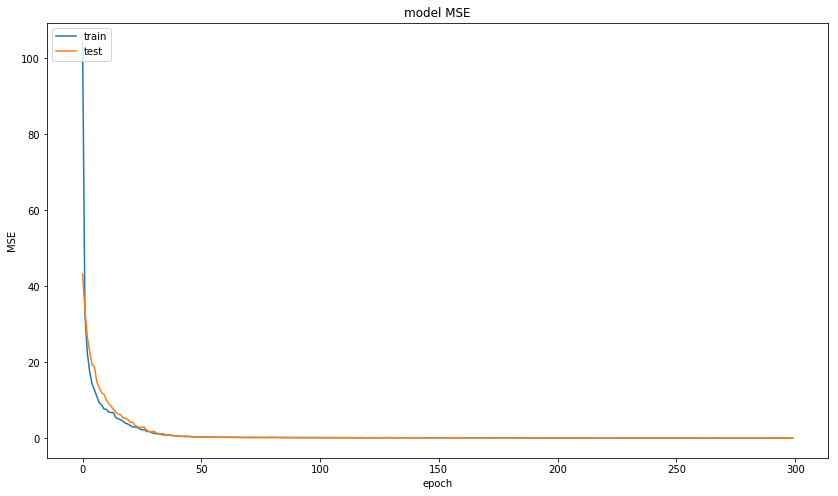

In [8]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

En este gráfico se aprecia el rápido decaimiento de la tasa de error, tanto en el conjunto de entrenamiento como el de validación. Es más, dentro de los primeros 20 epochs el aprendizaje de la red es notable, desde aquí hasta el epoch número 40 se aprecia que este decaimiento es menos pronunciado, mientras que desde el epoch 40avo, la disminucion del error es despreciable. Por esto, es que se puede afirmar que el modelo se encuentra en un óptimo local desde el cual no es capaz de salir (dado que el error no se mueve de los valores 0.08-0.09).  
Igualmente, es posible apreciar que, en cuanto a la convergencia del algoritmo, los errores presentan una cierta varianza que hace que el algoritmo tenga una convergencia más lenta de lo que se podria esperar. Esto es evidente al analizar el efecto alternante entre epoch 0 y epoch 45.


#### c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).  


In [9]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 229us/step - loss: 243.5086 - val_loss: 38.6088
Epoch 2/300
379/379 [==============================] - 0s 54us/step - loss: 17.0956 - val_loss: 17.6927
Epoch 3/300
379/379 [==============================] - 0s 49us/step - loss: 7.7472 - val_loss: 8.2167
Epoch 4/300
379/379 [==============================] - 0s 48us/step - loss: 4.4034 - val_loss: 5.1570
Epoch 5/300
379/379 [==============================] - 0s 55us/step - loss: 2.8828 - val_loss: 3.9675
Epoch 6/300
379/379 [==============================] - 0s 59us/step - loss: 1.9669 - val_loss: 2.7136
Epoch 7/300
379/379 [==============================] - 0s 39us/step - loss: 1.5202 - val_loss: 2.9020
Epoch 8/300
379/379 [==============================] - 0s 45us/step - loss: 1.3741 - val_loss: 2.4392
Epoch 9/300
379/379 [==============================] - 0s 47us/step - loss: 1.0936 - val_loss: 2.3001
Epoch 10/300
379/379 [========

379/379 [==============================] - 0s 45us/step - loss: 0.3370 - val_loss: 0.2041
Epoch 81/300
379/379 [==============================] - 0s 44us/step - loss: 0.0562 - val_loss: 0.2484
Epoch 82/300
379/379 [==============================] - 0s 43us/step - loss: 0.0721 - val_loss: 0.1673
Epoch 83/300
379/379 [==============================] - 0s 44us/step - loss: 0.0639 - val_loss: 0.2296
Epoch 84/300
379/379 [==============================] - 0s 45us/step - loss: 0.1949 - val_loss: 0.2190
Epoch 85/300
379/379 [==============================] - 0s 39us/step - loss: 0.2463 - val_loss: 0.2280
Epoch 86/300
379/379 [==============================] - 0s 53us/step - loss: 0.1502 - val_loss: 0.1487
Epoch 87/300
379/379 [==============================] - 0s 41us/step - loss: 0.0490 - val_loss: 0.1596
Epoch 88/300
379/379 [==============================] - 0s 41us/step - loss: 0.0655 - val_loss: 0.1536
Epoch 89/300
379/379 [==============================] - 0s 42us/step - loss: 0.0799 - 

379/379 [==============================] - 0s 50us/step - loss: 0.0237 - val_loss: 0.0889
Epoch 160/300
379/379 [==============================] - 0s 45us/step - loss: 0.0185 - val_loss: 0.0881
Epoch 161/300
379/379 [==============================] - 0s 41us/step - loss: 0.0194 - val_loss: 0.0841
Epoch 162/300
379/379 [==============================] - 0s 41us/step - loss: 0.0220 - val_loss: 0.1063
Epoch 163/300
379/379 [==============================] - 0s 48us/step - loss: 0.0205 - val_loss: 0.0851
Epoch 164/300
379/379 [==============================] - 0s 41us/step - loss: 0.0307 - val_loss: 0.1070
Epoch 165/300
379/379 [==============================] - 0s 52us/step - loss: 0.0529 - val_loss: 0.0920
Epoch 166/300
379/379 [==============================] - 0s 55us/step - loss: 0.0182 - val_loss: 0.1033
Epoch 167/300
379/379 [==============================] - 0s 43us/step - loss: 0.0232 - val_loss: 0.0826
Epoch 168/300
379/379 [==============================] - 0s 45us/step - loss: 

Epoch 238/300
379/379 [==============================] - 0s 45us/step - loss: 0.0161 - val_loss: 0.0663
Epoch 239/300
379/379 [==============================] - 0s 40us/step - loss: 0.0115 - val_loss: 0.0590
Epoch 240/300
379/379 [==============================] - 0s 40us/step - loss: 0.0186 - val_loss: 0.0617
Epoch 241/300
379/379 [==============================] - 0s 39us/step - loss: 0.0186 - val_loss: 0.0610
Epoch 242/300
379/379 [==============================] - 0s 44us/step - loss: 0.0210 - val_loss: 0.0758
Epoch 243/300
379/379 [==============================] - 0s 40us/step - loss: 0.0839 - val_loss: 0.0626
Epoch 244/300
379/379 [==============================] - 0s 41us/step - loss: 0.0131 - val_loss: 0.0855
Epoch 245/300
379/379 [==============================] - 0s 39us/step - loss: 0.0200 - val_loss: 0.0733
Epoch 246/300
379/379 [==============================] - 0s 42us/step - loss: 0.0391 - val_loss: 0.0579
Epoch 247/300
379/379 [==============================] - 0s 40us

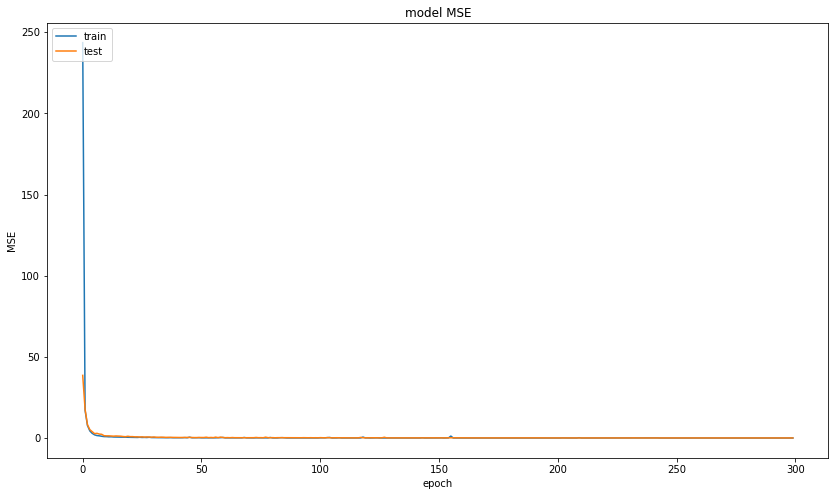

In [10]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

En este gráfico se aprecia el decaimiento mucho más claro que utilizando una función de activación Sigmoidal. Tanto errores de entrenamiento como de validacion corresponden a valores bastante pequeños y, claramente, con una menor varianza (casi nula) dado que no se da el caso de fluctuación apreciado en las celdas anteriores. Así entonces, dentro de los primeros 5 epochs el aprendizaje de la red es notable pues decae considerablemente el nivel de error, mientras que Sigmoid lo hace de manera más suave a través de los epochs.

Finalmente, se está en condiciones de aceptar a la función de activación ReLu como la adecuada; Considerando además la linealidad en el rango de valores positivos, tal como expone el problema de regresión planteado, es natural llegar a esta conclusión.



#### d)Repita b) y c) variando la tasa de aprendizaje (learning rate) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.



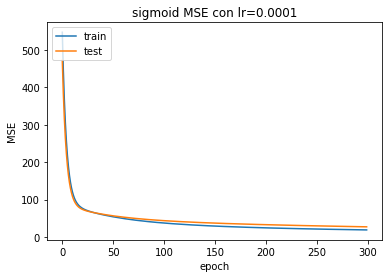

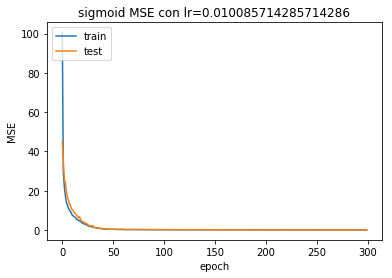

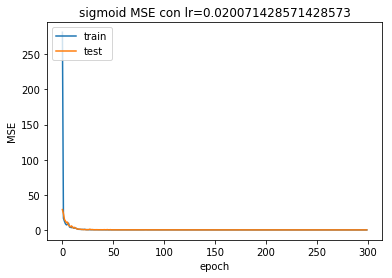

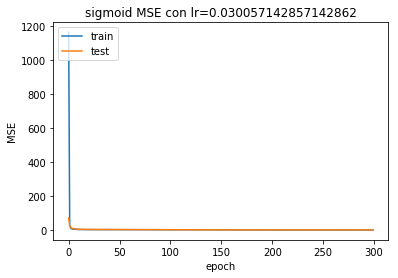

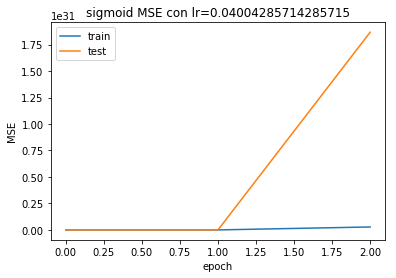

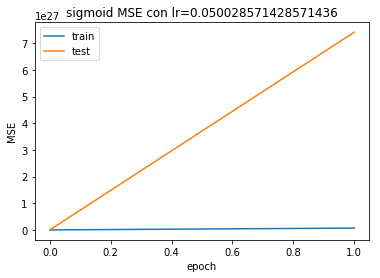

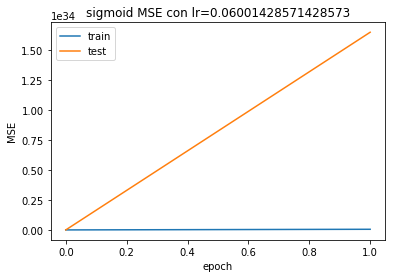

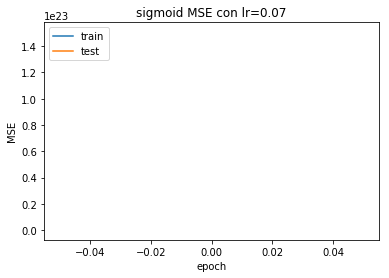

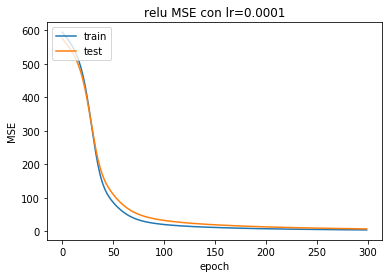

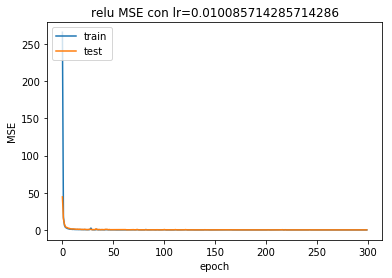

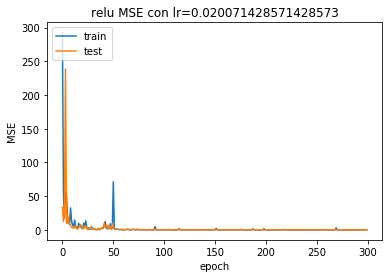

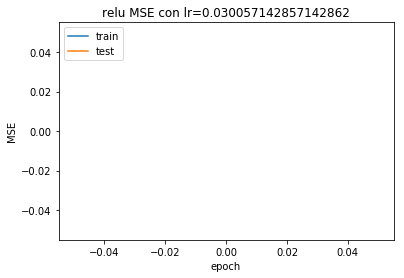

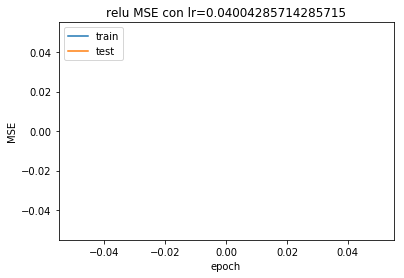

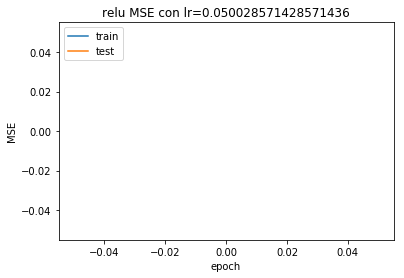

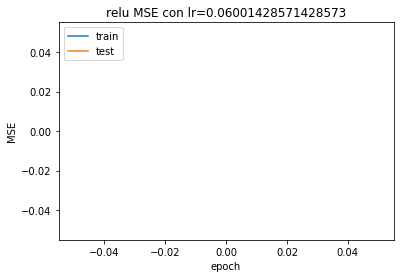

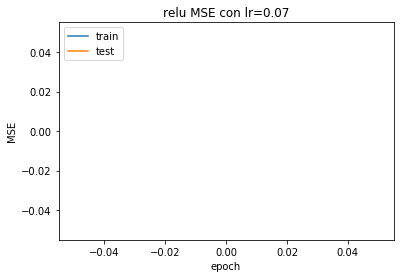

In [11]:
import numpy as np
n_lr = 8
lear_rate = np.linspace(0.0001,0.07,n_lr)
activacion=["sigmoid","relu"]
for a in activacion:  
    for r in lear_rate:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        plt.figure(figsize=(6,4))
        plt.plot(loss)
        plt.plot(val_loss)
        plt.title(a+' MSE con lr='+str(r))
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

Con el fin de trabajar en un rango de tasas de aprendizaje válidas, para efectos de los modelos a entrenar, se estableció que éstas debían pertenecer al rango 0.0001-0.07. Así entonces, se obtuvo que, para ciertas tasas de aprendizaje (aquellas de valores 'altos'), reflejaban someterse a un fenómeno de divergencia.  
Por esto, en los gráficos presentados, es apreciable la gran influencia del parámetro 'learning rate' cuando se utiliza un optimizador basado en gradientes.  
Así, cuando esta es toma valores muy bajos, el nivel de convergencia hacia un óptimo local es bastante lento dado que el reajuste de hiperparámetros se realiza con valores de actualización muy bajos. Al contrario, cuando esta tasa de aprendizaje toma valores más altos, la convergencia empieza a acelerarse. Sin embargo, si esta es muy grande, se producirá un efecto negativo en el entrenamiento de la red puesto que no se logrará llegar al óptimo dado que se caerá en una divergencia alejándose de él.  

Este efecto de divergencia se refleja en los valores infinitos que toman los errores (al estar alejándose del óptimo). Si bien estos valores no se explicitan, los gráficos sí lo hacen puesto que, aquellos valores demasiado altos se interpretan, para efectos de cálculo, como infinitos . Los cuales son imposible de representar visualmente y que, claro, se traducen a los valores NaN. Un ejemplo burdo de lo indicado es: 



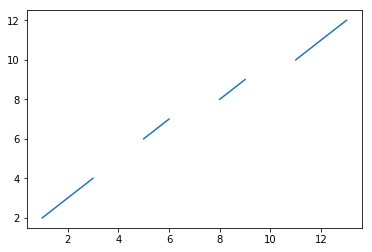

In [25]:
plt.plot([np.nan,2,3,4,np.nan, 6,7,np.inf,8,9, np.nan,10,11,12])


A continuación, de manera más clara, se presentan los casos de divergencia apreciados tanto para la función de activación Sigmoidal como ReLu. 

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 4ms/step - loss: 1909489211853.1011 - val_loss: 276330339860221.9688
Epoch 2/300
379/379 [==============================] - 0s 65us/step - loss: 412155722966751791546368.0000 - val_loss: 62498283297310958734540800.0000
Epoch 3/300
379/379 [==============================] - 0s 69us/step - loss: 36360758910446967196356067628941312.0000 - val_loss: 2005907171434633257736305093375950848.0000
Epoch 4/300
379/379 [==============================] - 0s 69us/step - loss: nan - val_loss: nan                  
Epoch 5/300
379/379 [==============================] - 0s 70us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 79us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 81us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 72us/step - loss: nan - val_loss: nan
Epoch 9

Epoch 167/300
379/379 [==============================] - 0s 112us/step - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s 90us/step - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s 87us/step - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s 77us/step - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s 72us/step - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s 69us/step - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s 72us/step - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s 68us/step - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s 76us/step - loss: nan - val_loss: nan
Epoch 176/300
379/379 [==============================] - 0s 75us/step - loss: nan - val_loss: nan
Epoch 177/300
379/3

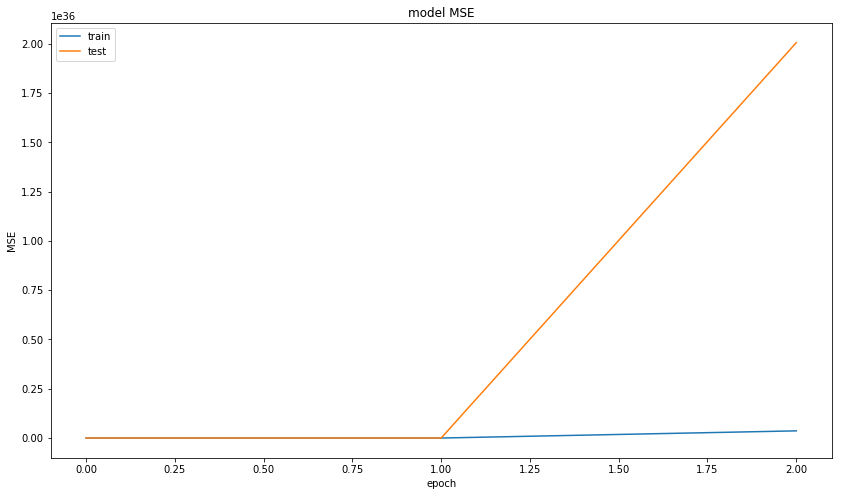

In [26]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.031),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=1, validation_data=(X_test_scaled, y_test))


plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 2s 4ms/step - loss: 280.1833 - val_loss: 49.5325
Epoch 2/300
379/379 [==============================] - 0s 55us/step - loss: 73.3864 - val_loss: 89.0154
Epoch 3/300
379/379 [==============================] - 0s 72us/step - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s 69us/step - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s 62us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 66us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 69us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 70us/step - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s 60us/step - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s 72us/step - los

Epoch 85/300
379/379 [==============================] - 0s 63us/step - loss: nan - val_loss: nan
Epoch 86/300
379/379 [==============================] - 0s 66us/step - loss: nan - val_loss: nan
Epoch 87/300
379/379 [==============================] - 0s 60us/step - loss: nan - val_loss: nan
Epoch 88/300
379/379 [==============================] - 0s 65us/step - loss: nan - val_loss: nan
Epoch 89/300
379/379 [==============================] - 0s 66us/step - loss: nan - val_loss: nan
Epoch 90/300
379/379 [==============================] - 0s 63us/step - loss: nan - val_loss: nan
Epoch 91/300
379/379 [==============================] - 0s 68us/step - loss: nan - val_loss: nan
Epoch 92/300
379/379 [==============================] - 0s 60us/step - loss: nan - val_loss: nan
Epoch 93/300
379/379 [==============================] - 0s 64us/step - loss: nan - val_loss: nan
Epoch 94/300
379/379 [==============================] - 0s 62us/step - loss: nan - val_loss: nan
Epoch 95/300
379/379 [========

379/379 [==============================] - 0s 66us/step - loss: nan - val_loss: nan
Epoch 252/300
379/379 [==============================] - 0s 61us/step - loss: nan - val_loss: nan
Epoch 253/300
379/379 [==============================] - 0s 66us/step - loss: nan - val_loss: nan
Epoch 254/300
379/379 [==============================] - 0s 65us/step - loss: nan - val_loss: nan
Epoch 255/300
379/379 [==============================] - 0s 221us/step - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s 62us/step - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s 69us/step - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s 67us/step - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s 68us/step - loss: nan - val_loss: nan
Epoch 260/300
379/379 [==============================] - 0s 65us/step - loss: nan - val_loss: nan
Epoch 261/300
379/379 [==========

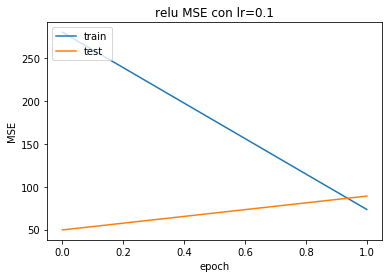

In [33]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=(SGD(lr=0.0229)),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
                    verbose=1, validation_data=(X_test_scaled, y_test))

loss = history.history['loss'].copy()
val_loss = history.history['val_loss'].copy()
plt.figure(figsize=(6,4))
plt.plot(loss)
plt.plot(val_loss)
plt.title(a+' MSE con lr='+str(r))
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Así entonces, la red entrenada con función Sigmoidal, permite convergencia hacia un óptimo local cuando la tasa de aprendizaje no supera el 0.03. Por sobre este valor, se aprecia el fenómeno de divergencia de la red. Es decir, en lugar de acercarse y ajustar los parámetros para alcanzar un óptimo, la alta tasa de aprendizaje produce un cambio en los hiperparámetros que produce un salto que aleja al algoritmo de los óptimos traduciéndose en erorres mucho mayores que los ya alcanzados, tal como ya se comentó. Así, no se permite el reajustaste en la dirección correcta. 

A continuación se presenta el entrenamiento, y sus valores de error, para las configuraciones de función de activacion Sigmoidal y ReLU en base a diferentes tasa de aprendizaje. Tasas que han sido reajustadas a fin de no diverger

In [34]:
import numpy as np
n_lr = 8
lear_rate_sig = np.linspace(0.0001,0.03,n_lr)
activacion="sigmoid" 
loss_val=[]
for r in lear_rate_sig:
    itera=[]
    model = Sequential() 
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=300,
                        verbose=0, validation_data=(X_test_scaled, y_test))

    loss = history.history['loss'].copy()
    val_loss = history.history['val_loss'].copy()
    itera.append(loss)
    itera.append(val_loss)
    loss_val.append(itera)

n_lr = 8
lear_rate_relu = np.linspace(0.0001,0.025,n_lr)
activacion="relu"
loss_val2=[]
for r in lear_rate_relu:
    itera2=[]
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=(SGD(lr=r)),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=300,
                        verbose=0, validation_data=(X_test_scaled, y_test))

    loss = history.history['loss'].copy()
    val_loss = history.history['val_loss'].copy()
    itera2.append(loss)
    itera2.append(val_loss)
    loss_val2.append(itera)


## hacer grafico  (all in one)

#### e) Entrene los modelos considerados en b) y c) usando *progressive decay*. Compare y comente.



Valores de tasas de decaimiento a aplicar:  [1.00000000e-06 4.64158883e-06 2.15443469e-05 1.00000000e-04
 4.64158883e-04 2.15443469e-03 1.00000000e-02 4.64158883e-02
 2.15443469e-01 1.00000000e+00]


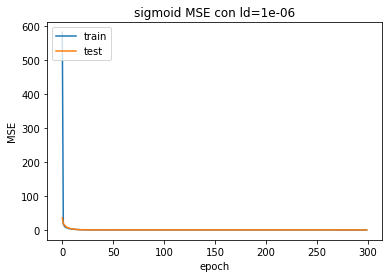

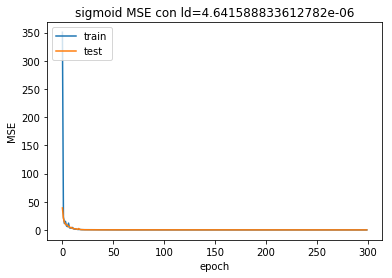

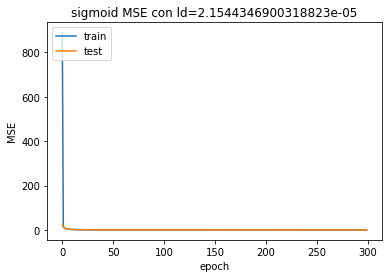

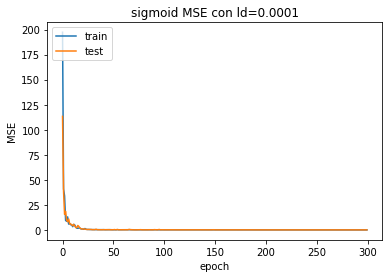

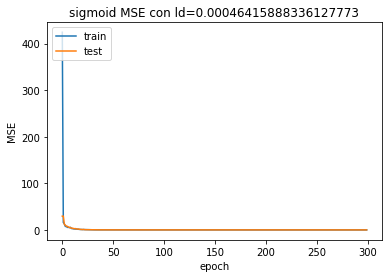

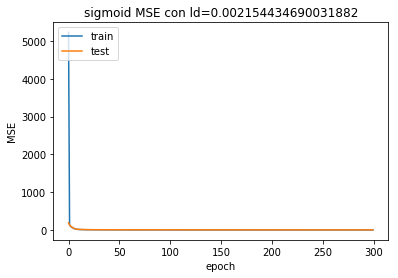

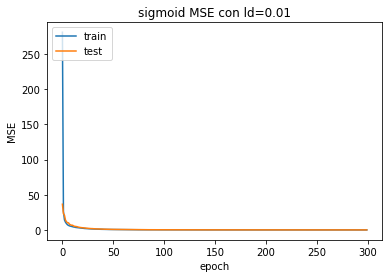

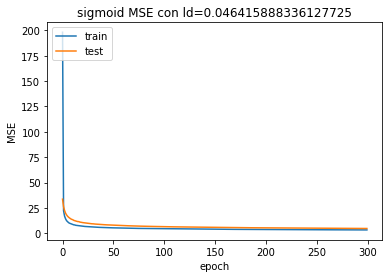

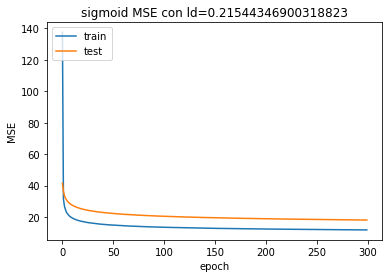

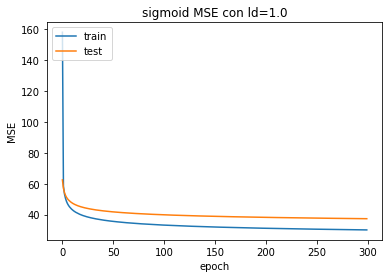

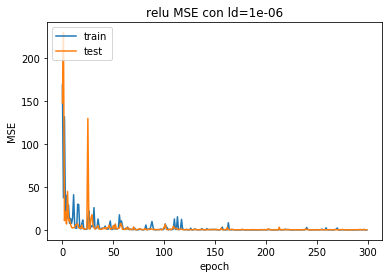

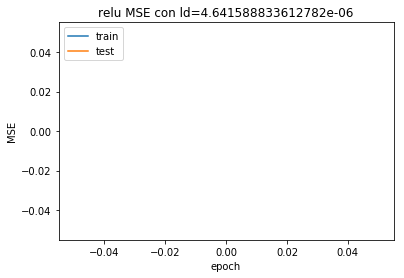

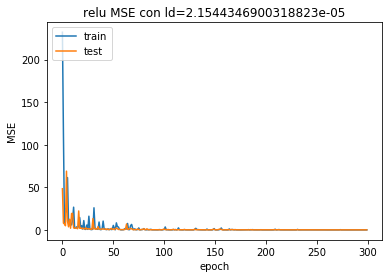

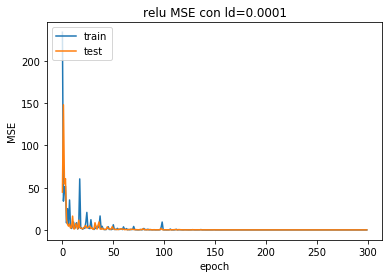

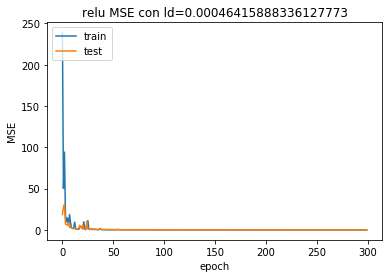

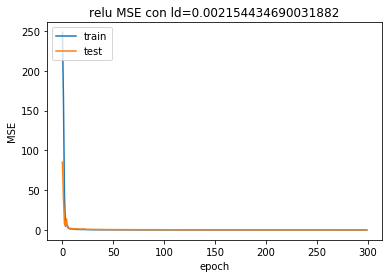

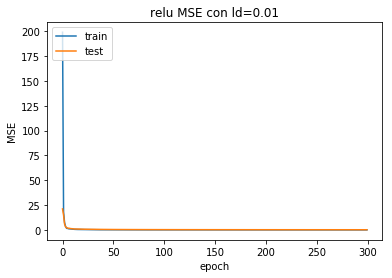

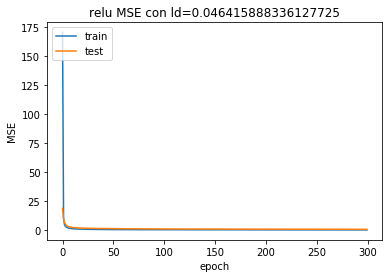

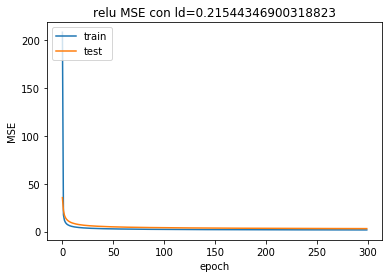

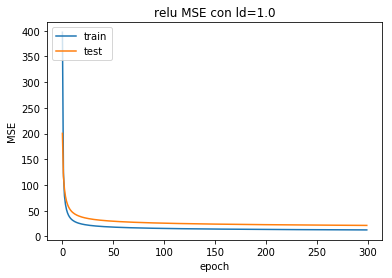

In [39]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
print ("Valores de tasas de decaimiento a aplicar: ",lear_decay)
activacion=["sigmoid","relu"]
for a in activacion:  
    for r in lear_decay:
        #plt.figure(figsize=(10,6))
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        #modificar la tasa del sgd learning rate
        model.compile(optimizer=(SGD(lr=0.02,decay=r)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        plt.plot(loss)
        plt.plot(val_loss)
        plt.title(a+' MSE con ld='+str(r))
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
        

        

In [38]:
#HACER GRAFICO progressive decay TODO EN 1
'''
plt.plot(loss)
plt.plot(val_loss)
plt.title(a+' MSE con ld='+str(r))
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
'''

"\nplt.plot(loss)\nplt.plot(val_loss)\nplt.title(a+' MSE con ld='+str(r))\nplt.ylabel('MSE')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()\n"

Con una tasa de entrenamiento fija en 0.02, se observa que la aplicación de progressive decay permite...



Este hiperparámetro afecta de manera tal que...
### decir que hace

vale decir, que el efecto de la aplicación de éste, sobre Sigmoidal como sobre RaLu, afecta del mismo modo. Es decir, valores pequeños (e-6 - e-4) el decaimiento del error es lento y suave, mientras que con valolres altos, la tendencia se ve afectada de manera tal que el error de pruebas (test) se desplaza hacia arriba, es decir, aumenta.  

# alguna ventaja de una funcion respecto a la otra?
# valores de errores en entrenamiento y validacion/test se mantienen?


A fin de conocer la configuración de parámetros que permite obtener resultados destacables, se presenta a continuación el efecto, sobre los errores de entrenamiento y validación (en base a funciones de activación Sigmoidal y ReLu), de variar la tasa de aprendizaje dentro de un rango predefinido: 

[1.00000000e-06 5.17947468e-06 2.68269580e-05 1.38949549e-04
 7.19685673e-04 3.72759372e-03 1.93069773e-02 1.00000000e-01]


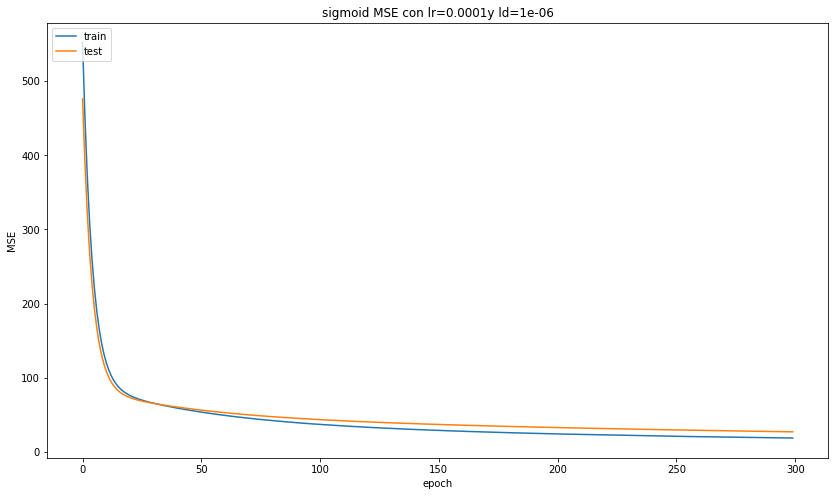

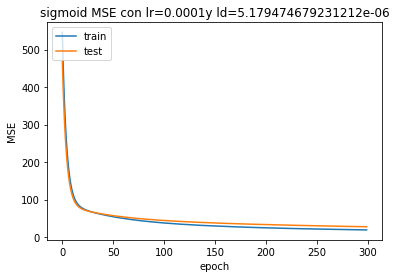

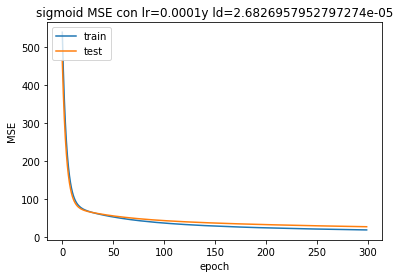

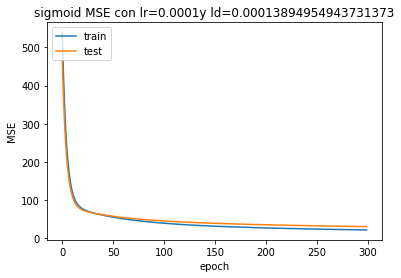

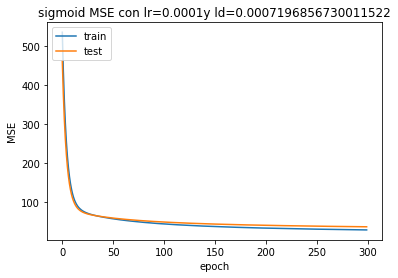

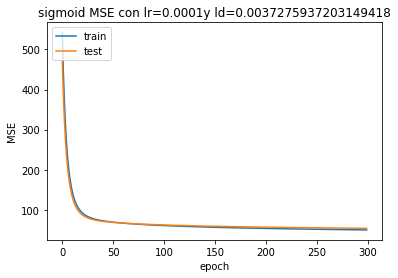

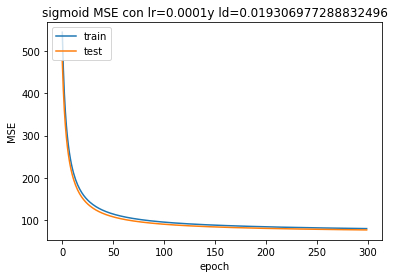

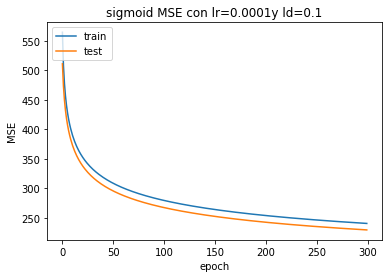

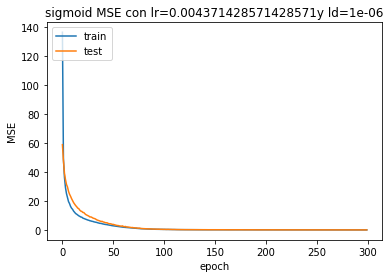

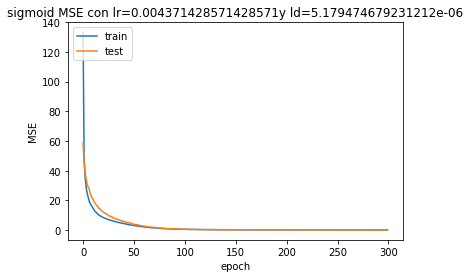

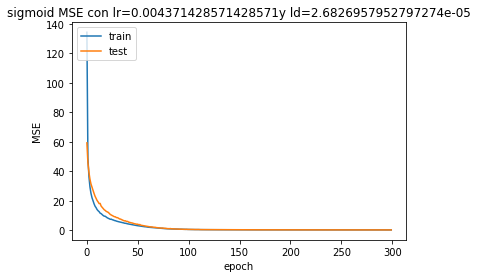

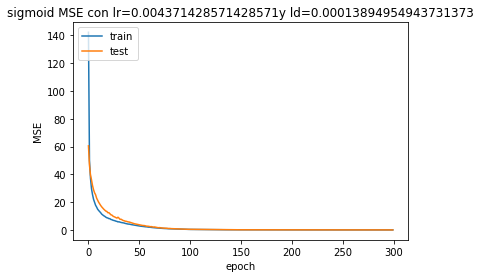

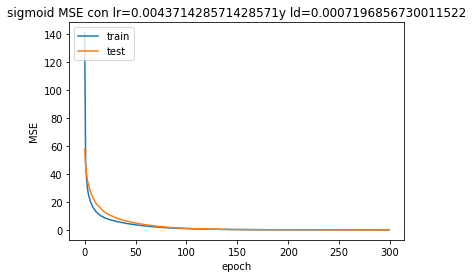

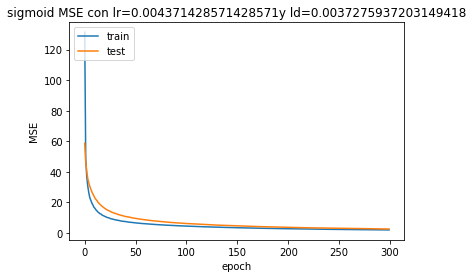

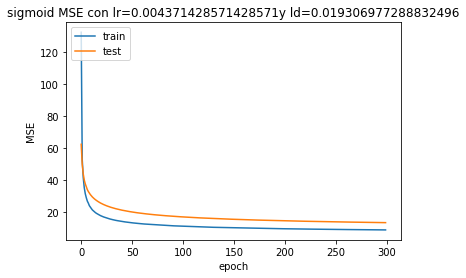

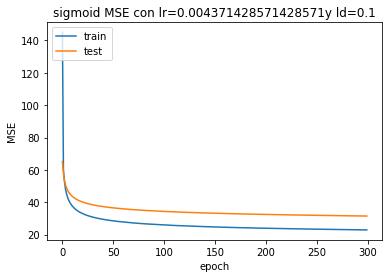

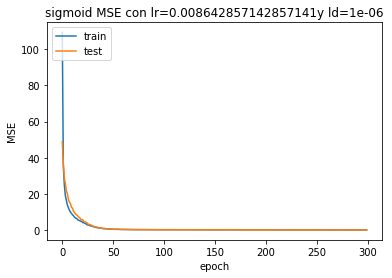

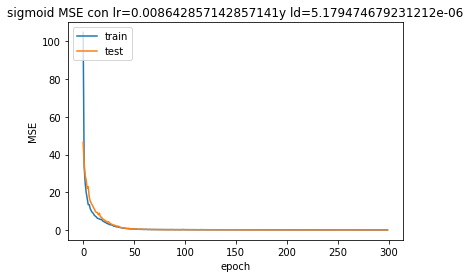

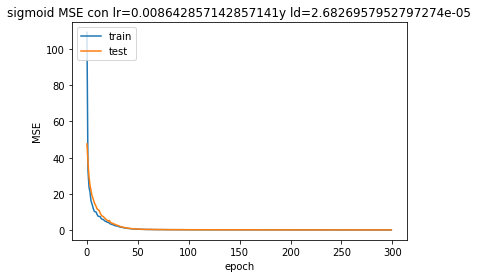

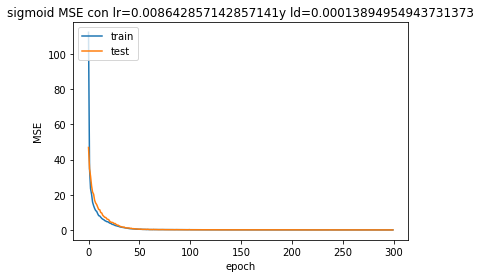

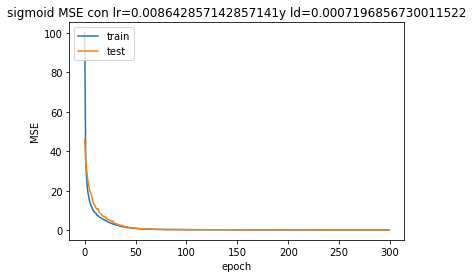

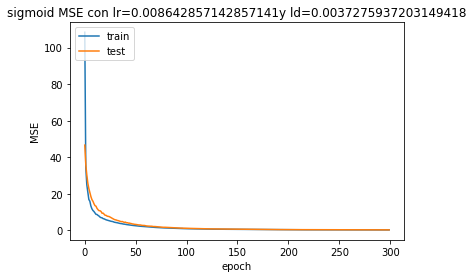

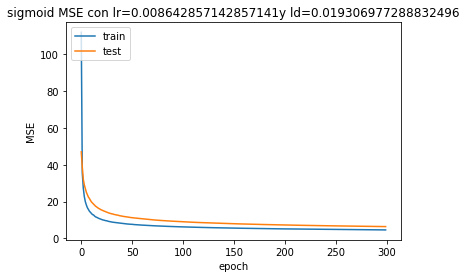

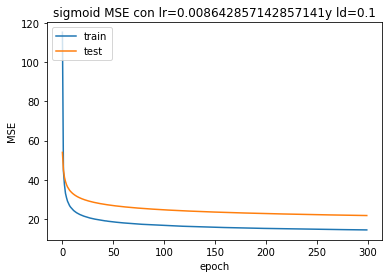

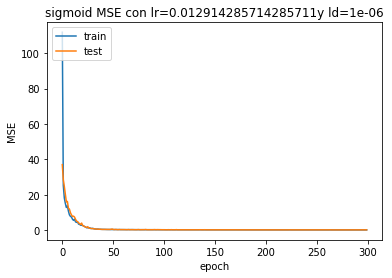

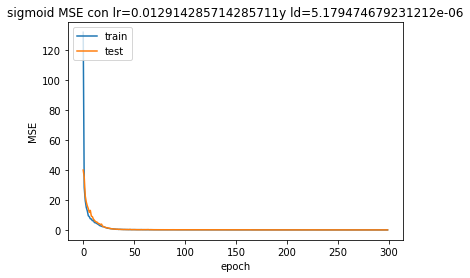

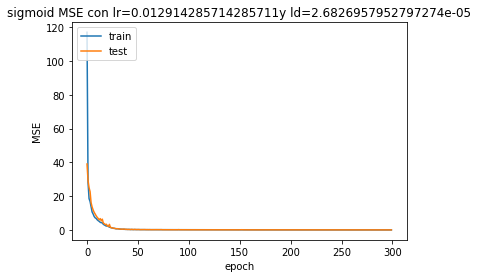

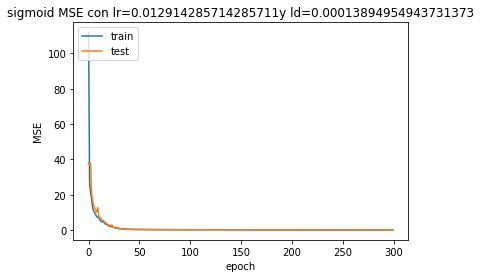

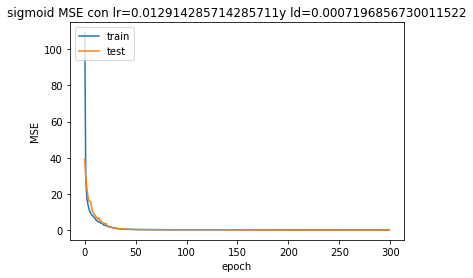

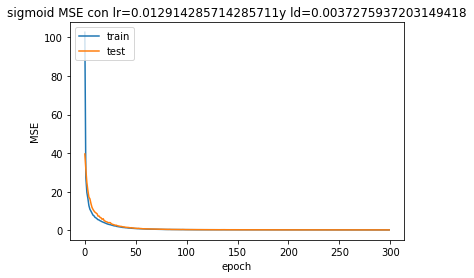

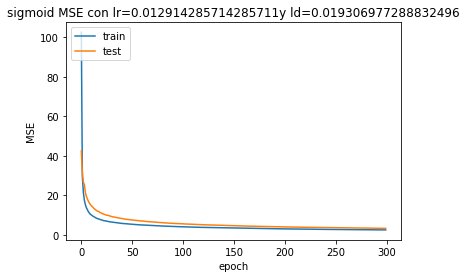

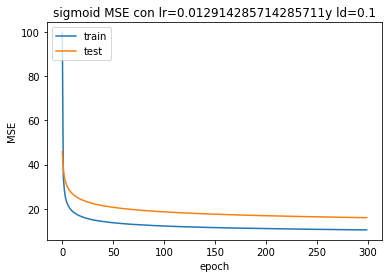

KeyboardInterrupt: 

In [64]:
n_decay = 8 #cambiar
n_lr=8 #cambiar
lear_decay = np.logspace(-6,-1,n_decay)
lear_rate = np.linspace(0.0001,0.03,n_lr)
print (lear_decay)
activacion=["sigmoid","relu"]
for a in activacion:  
    plt.figure(figsize=(14,8))
    for lr in lear_rate:
        for r in lear_decay:
            model = Sequential()
            model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
            model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
            #modificar la tasa del sgd learning rate
            model.compile(optimizer=(SGD(lr=lr,decay=r)),loss='mean_squared_error')
            history = model.fit(X_train_scaled, y_train, epochs=300,
                                verbose=0, validation_data=(X_test_scaled, y_test))
            loss = history.history['loss'].copy()
            val_loss = history.history['val_loss'].copy()
            plt.plot(loss)
            plt.plot(val_loss)
            plt.title(a+' MSE con lr='+str(lr)+'y ld='+str(r))
            plt.ylabel('MSE')
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
        
        



## analizar como afectan los cambios

#### f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-*batches*. Experimente con diferentes tamaños del *batch*. Comente.
```python
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
model.fit(X_train_scaled.as_matrix(),y_train.as_matrix(),batch_size=50,epochs=300)
```


In [ ]:
n_batches = 21
batch_sizes = np.linspace(1,2000,n_batches,dtype=np.int)
print (batch_sizes)
#batch_sizes= [10,20,50,75,100,200,300]
activacion=["sigmoid","relu"]
for a in activacion:  
    #plt.figure(figsize=(14,8))
    for r in batch_sizes:
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        #modificar la tasa del sgd learning rate
        model.compile(optimizer=(SGD(lr=0.02)),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,verbose=0, batch_size=r,validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        plt.plot(loss)
        plt.plot(val_loss)
        plt.title(a+' MSE con batch size='+str(r))
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        
        



[   1  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000]


## analizar y comentar

#### g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de pruebas?
```python
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
moptimizer = Adagrad(lr=0.01)
model.compile(optimizer=moptimizer)
model.fit(X_train_scaled.as_matrix(),y_train.as_matrix())
```


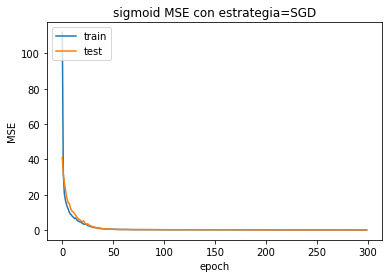

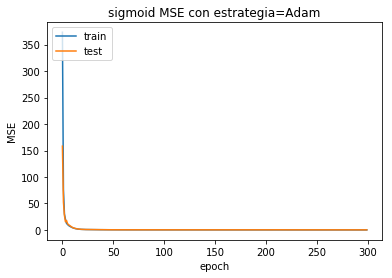

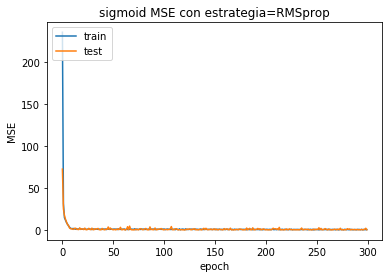

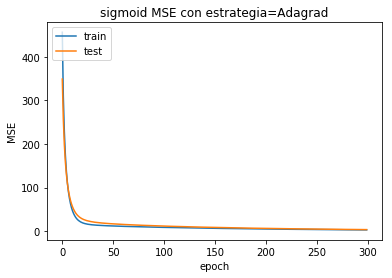

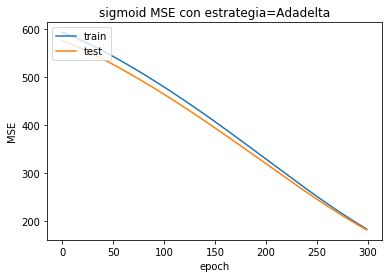

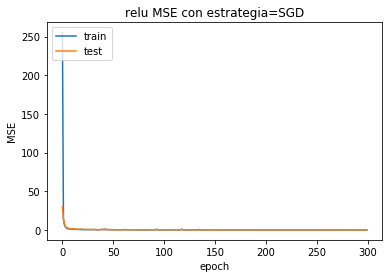

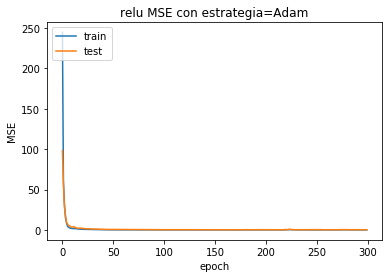

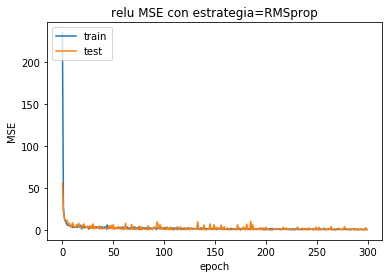

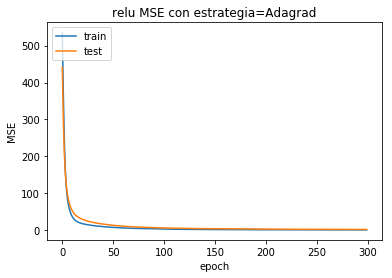

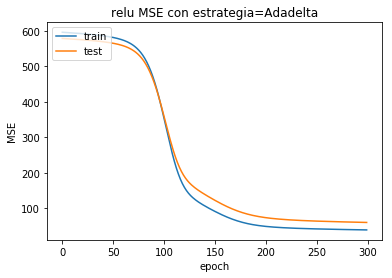

In [42]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

estrategias={}
estrategias['SGD']=SGD(lr=0.01)
estrategias['Adam']=Adam(lr=0.01)
estrategias['RMSprop']=RMSprop(lr=0.01)
estrategias['Adagrad']=Adagrad(lr=0.01)
estrategias['Adadelta']=Adadelta(lr=0.01)
activacion=["sigmoid","relu"]

for a in activacion:  
    #plt.figure(figsize=(14,8))
    for estrat in estrategias.keys():
        model = Sequential()
        model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation=a))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=(estrategias[estrat]),loss='mean_squared_error')
        history = model.fit(X_train_scaled, y_train, epochs=300,
                            verbose=0, validation_data=(X_test_scaled, y_test))
        loss = history.history['loss'].copy()
        val_loss = history.history['val_loss'].copy()
        plt.plot(loss)
        plt.plot(val_loss)
        plt.title(a+' MSE con estrategia='+str(estrat))
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()



## comentar qué se observa! 


#### h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (*weight decay*). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa *vs* la segunda, comente.
```python
model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,kernel_initializer='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))
```


#### Sigmoidal original

In [52]:
trains=[]
vals=[]
etiquetas=["Original", "Norma L1", "Norma L2"]

model_orig = Sequential()
model_orig.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model_orig.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model_orig.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model_orig.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
trains.append(history.history['loss'])
vals.append(history.history['val_loss'])

#### Sigmoidal con regularizador L_1

In [53]:
from keras.regularizers import *
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                W_regularizer=l1(0.01),activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                W_regularizer=l1(0.01))) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
trains.append(history.history['loss'])
vals.append(history.history['val_loss'])

/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=15, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`
  


#### Sigmoidal con regularizador L_2

In [54]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                W_regularizer=l2(0.01),activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                W_regularizer=l2(0.01))) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
trains.append(history.history['loss'])
vals.append(history.history['val_loss'])

/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=15, kernel_initializer="uniform", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`
  """


In [55]:
trainsrelu=[]
valsrelu=[]
etiquetas=["Original", "Norma L1", "Norma L2"]

model_orig = Sequential()
model_orig.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model_orig.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model_orig.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model_orig.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
trainsrelu.append(history.history['loss'])
valsrelu.append(history.history['val_loss'])

from keras.regularizers import *
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                W_regularizer=l1(0.01),activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                W_regularizer=l1(0.01))) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
trainsrelu.append(history.history['loss'])
valsrelu.append(history.history['val_loss'])


model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',
                W_regularizer=l2(0.01),activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear", 
                W_regularizer=l2(0.01))) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=300,
    verbose=0, validation_data=(X_test_scaled, y_test))
trainsrelu.append(history.history['loss'])
valsrelu.append(history.history['val_loss'])

/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=15, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, input_dim=15, kernel_initializer="uniform", activation="relu", kernel_regularizer=<keras.reg...)`
/home/cony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="linear", kernel_regularizer=<keras.reg...)`


In [59]:
## HACER GRAFICO

#### i) Entrene los modelos obtenidos en b) y c) utilizando *Dropout*. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.
```python
from keras.layers import Dropout
model = Sequential()
...
model.add(Dropout(0.2))
...
```


#### j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de *folds* igual a *K* = 5 y *K*=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.
```python
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = #model with hiperparam
    # Compile model
    model.compile(optimizer=,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], epochs=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)
```

<a id="segundo"></a>
## 2. Deep Networks
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?  

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />



En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. 

> a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de pruebas.
```python
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('MEDV').values.reshape(-1,1)
```
> b) Para el mismo problema definido anteriormente ([sección 1](#primero)) se entrenará diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* (__[link](https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients)__) en el *backend* de Keras. Deberá generar un **histograma** para todos los pesos de cada capa antes y despues del entrenamiento con 300 *epochs*. Comente.

```python
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
```
> c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho mas profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visual visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.

```python
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
```

> d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[1]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar.

```python
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
```

> e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He [[2]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.

```python
#uniform
...
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
...
#he initializer
...
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
...
```
> e) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, *momentum*, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (*mse*) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

> f) Pruebe con utilizar una red *shallow* (poco profunda), es decir, sitúe todas las neuronas en una única capa ¿Qué sucede con la convergencia del algoritmo? ¿Por qué sucede este fenómeno?
```python
model = Sequential()
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='choose',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='choose',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), epochs=300,
    verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
```

In [7]:
#a) importacion de datos 
import pandas as pd
from sklearn.cross_validation import train_test_split

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
#CHAS, variabole categorica
df = pd.get_dummies(df,columns=["CHAS"])
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)

from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('MEDV').values.reshape(-1,1)


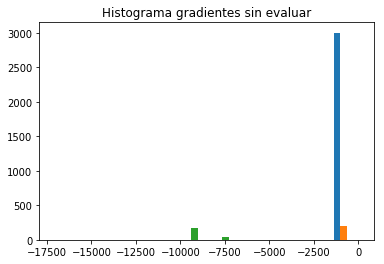

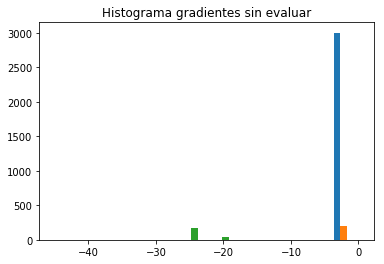

In [29]:
#b
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
#print(gradients)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})


#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()

evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()




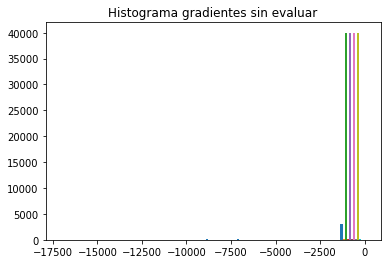

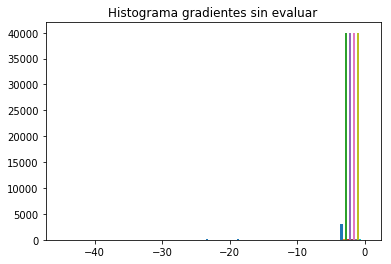

In [30]:
#c
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')


###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()

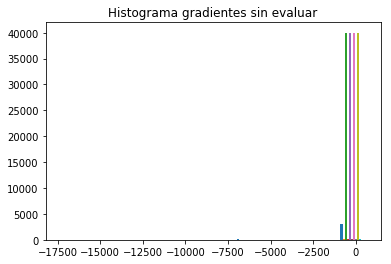

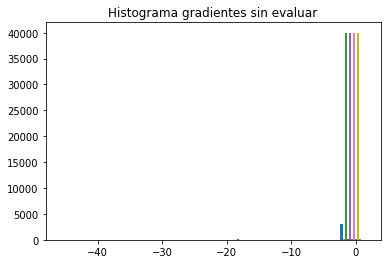

In [31]:
#d
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')


###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()

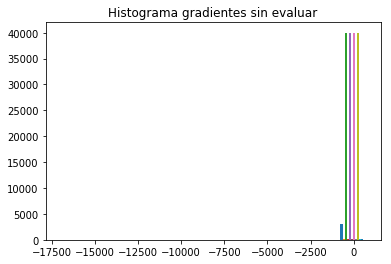

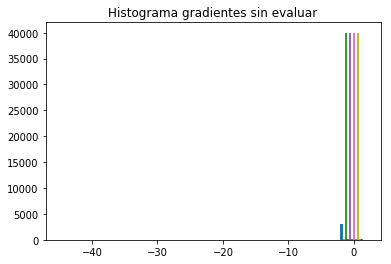

In [32]:
#e
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')


###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()


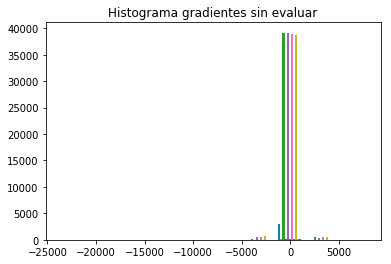

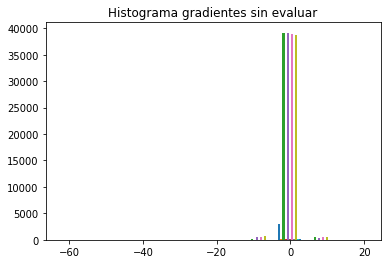

In [33]:
#e-2
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')


###calculate gradients
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})

#estos histogramas aun son place-holder
import matplotlib.pyplot as plt
plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

plt.hist(evaluated_gradients)
plt.title("Histograma gradientes sin evaluar")
plt.show()


<a id="tercero"></a>
## 3. Convolutional Neural Network (CNN) en CIFAR.

En esta sección trabajaremos con un *dataset* bastante conocido y utilizado por la comunidad para experimentar con reconocimiento de objetos en imágenes: **CIFAR10** [[3]](#refs). Se trata de un conjunto de 60.000 imágenes RGB de 32 × 32 pixeles que contiene 10 clases de objetos y 6000 ejemplos por clase. La versión utilizada se atribuye a *A. Krizhevsky, V. Nair y G. Hinton* y viene separada en 50000 ejemplos de entrenamiento y 10000 casos de prueba. El conjunto de pruebas fue obtenido seleccionando 1000 imágenes aleatorias de cada clase. Los datos restantes han sido ordenados aleatoriamente y están organizados en 5 bloques de entrenamiento (*batches*). Las clases son mutuamente excluyentes y corresponden a las siguientes categorı́as: gatos, perros, ranas, caballos, pájaros, ciervos, aviones, automóviles, camiones y barcos. Para esta tarea se experimentará con redes convolucionales, conocidas como CNNs ó *ConvNets*.  
Nota: *Para esta actividad es bastante aconsejable entrenar las redes usando una GPU, ya que de otro modo los tiempos de entrenamiento son largos, por lo que recuerde instalar keras con gpu y el driver de __[cuda](https://developer.nvidia.com/cuda-downloads)__ para la tarjeta gráfica*.  

Los datos asociados a esta actividad podrán ser obtenidos utilizando los siguientes comandos en la lı́nea
de comandos (sistemas UNIX)
```
wget http://octopus.inf.utfsm.cl/~ricky/data.tar.gz
tar -xzvf data.tar.gz
rm data.tar.gz
```
En la carpeta generada encontrarán 5 archivos denominados ’*data batch 1*’, ’*data batch 2*’, ’*data batch 3*’,
’*data batch 4*’, ’*data batch 5*’ y ’*test batch*’ correspondientes a los 5 bloques de entrenamiento y al conjunto
de pruebas respectivamente. Los archivos corresponden a diccionarios serializados de Python, utilizando la librería Pickle.  
Una vez extraı́do, cada diccionario contendrá 2 elementos importantes: *data* y *labels*. El primer elemento (*data*) es un matriz de 10000 × 3072 (*numpy array*). Cada fila de esa matriz corresponde a una imagen RGB: los primeros 1024 valores vienen del canal R, los siguientes 1024 del canal G, y los últimos 1024 del canal B. Para cada canal, las imágenes han sido vectorizadas por filas, de modo que los primeros 32 valores del canal R corresponden a la primera fila de la imagen. Por otro lado, el elemento (*labels*) del diccionario contiene una lista de 1000 valores enteros entre 0 y 9 que identifican las clases antes enumeradas.

> a) Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema CIFAR generando como salida: (i) dos matrices $X_{tr}$, $Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento, (ii) dos matrices $X_t$ , $Y_t$ , correspondientes a las imágenes y etiquetas de pruebas, y finalmente (iii) dos matrices $X_v$,$Y_v$, correspondientes a imágenes y etiquetas que se usarán como conjunto de validación, es decir para tomar decisiones de diseño acerca del modelo. Este último conjunto debe ser extraı́do desde el conjunto de entrenamiento original y no debe superar las 5000 imágenes.

```python
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import cPickle as pickle
import numpy as np
import os
from scipy.misc import imread
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y
def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    #add your Xval
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
```

> b) Prepare subconjuntos de entrenamiento, validación y pruebas normalizando las imágenes de entrenamiento y pruebas, dividiendo las intensidades originales de pixel en cada canal por 255. Es importante recordar que ahora se trabajará con la estructura original de los datos, por lo que es necesario recuperar la forma original de las imágenes del vector en el archivo en que vienen. Además, si desea trabajar con el orden de las dimensiones denominado ’tf’ (por defecto para *TensorFlow*) deberá hacer realizar la transposición correspondiente.
Finalmente, genere una representación adecuada de las salidas deseadas de la red.

```python
import keras
x_train = x_train.reshape((x_train.shape[0],3,32,32))
x_train = x_train.transpose([0, 2, 3, 1]) #only if 'tf' dim-ordering is to be used
x_test= x_test.reshape((x_test.shape[0],3,32,32))
x_test= x_test.transpose([0, 2, 3, 1])#remove if 'th' dim-ordering is to be used
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
```

> c) Defina una CNN con arquitectura $C \times P \times C \times P \times F \times F$. Para ambas capas convolucionales utilice 64 filtros de $3 \times 3$ y funciones de activación ReLu. Para las capas de pooling utilice filtros de $2 \times 2$ con stride 2. Para la capa MLP escondida use 512 neuronas. Genere un esquema lo más compacto posible que muestre los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un forward-pass y el número de parámetros de cada capa.

```python
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
```

> d)  Entrene la CNN definida en c) utilizando SGD. En este dataset, una tasa de aprendizaje “segura” es $\eta = 10^4$ o inferior, pero durante las primeras *epochs* el entrenamiento resulta demasiado lento. Para resolver el problema aprenderemos a controlar la tasa de aprendizaje utilizada en el entrenamiento. Implemente la siguiente idea: deseamos partir con una tasa de aprendizaje $\eta = 10^3$ y dividir por 2 ese valor cada 10 epochs. Suponga además que no queremos usar una tasa de aprendizaje menor a $\eta = 10^5$.  Construya un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de “epochs”, entrene con 25 *epochs*.

```python
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
model.compile( ... )
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_test,y_test), shuffle=True, callbacks=[lrate])
```
> e) Entrene la CNN definida en c) utilizando **RMSProp** durante 25 *epochs*. Elija la función de pérdida más apropiada para este problema. Construya finalmente un gráfico que muestre los errores de entrenamiento, validación y pruebas como función del número de *epochs*.

```python
from keras.optimizers import SGD, rmsprop
opt = rmsprop(lr=0.001, decay=1e-6)
model.compile( ... )
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs, validation_data=(x_test, y_test),shuffle=True)
```

> f) Evalúe el efecto de modificar el tamaño de los filtros (de convolución) reportando la sensibilidad del error de pruebas a estos cambios en dos tipos de arquitecturas, una profunda y otra no. Presente un gráfico o tabla resumen. Por simplicidad entre durante sólo 15-20 *epochs*.

```python
#Shallow network
nc = #convolutional filter size
model = Sequential()
model.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
```

> g) Se ha sugerido que la práctica bastante habitual de continuar una capa convolucional con una capa de *pooling* puede generar una reducción prematura de las dimensiones del patrón de entrada. Experimente con una arquitectura del tipo $C \times C \times P \times C \times C \times P \times F \times F$. Use 64 filtros para las primeras 2 capas convolucionales y 128 para las últimas dos. Reflexione sobre qué le parece más sensato: ¿mantener el tamaño de los filtros usados anteriormente? o ¿usar filtros más grandes en la segunda capa convolucional y más pequeños en la primera? o ¿usar filtros más pequeños en la segunda capa convolucional y más grandes en la primera? *Hint*: con esta nueva arquitectura debiese superar el 70% de accuracy (de validación/test) antes de 5 epochs, pero la arquitectura es más sensible a overfitting por lo que podrı́a ser conveniente agregar un regularizador. Como resultado final de esta actividad gráficque los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).

```python
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
...
```

> h) Algunos investigadores, han propuesto que las capas de *pooling* se pueden reemplazar por capas convoluciones con stride 2. ¿Se reduce dimensionalidad de este modo? Compruébelo verificando los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un *forward-pass*. Entrene la red resultante con el método que prefiera, gráficando los errores de entrenamiento, validación y pruebas como función del número de “epochs” (fijando el máximo en un número razonable como T = 25).

```python
...
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
...
```

> i) Una forma interesante de regularizar modelos entrenados para visión artificial consiste en “aumentar” el número de ejemplos de entrenamiento usando transformaciones sencillas como: rotaciones, corrimientos y reflexiones, tanto horizontales como verticales. Explique porqué este procedimiento podrı́a ayudar a mejorar el modelo y el porqué las etiquetas no cambian al aplicar estas operaciones. Evalúe experimentalmente la conveniencia de incorporarlo.

```python
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,validation_data=(x_test, y_test))
```

> j) Elija una de las redes entrenadas en esta sección (preferentemente una con buen desempeño) y determine los pares de objetos (por ejemplo “camiones” con “autos”) que la red tiende a confundir. Conjeture el motivo de tal confusión.

> k) Elija una de las redes entrenadas (preferentemente una con buen desempeño) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice además el efecto del filtro sobre algunas imágenes de entrenamiento. Repita el proceso para los pesos de la última capa convolucional. Comente.

In [1]:
#a definir la funciones previas
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import _pickle as pickle
import numpy as np
import os
#from scipy.misc import imread
#imread is deprecated! imread is deprecated in SciPy 1.0.0, and will be removed in 1.2.0. 
#Use imageio.imread instead.
from imageio import imread
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y
def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    #add your Xval
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [19]:
#b definir el dataset
import keras
from keras.datasets import cifar10
import _pickle as pickle
import numpy as np
import os

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PATH = './cifar'
num_classes = len(label_names)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#(x_train, y_train), (x_test, y_test) = load_CIFAR10(PATH)

#b definir el dataset
from sklearn.model_selection import train_test_split
#Aqui se deben ocupar las funciones de la pregunta anterior

x_train = x_train/255.0
x_test = x_test/255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.09, random_state=42)

In [22]:
x_train.shape

(45500, 32, 32, 3)

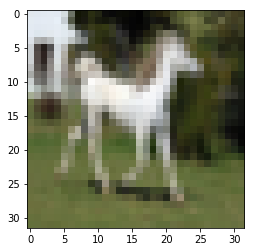

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])
plt.show()

In [24]:
#c definir el modelo
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [25]:
#d entrenar el modelo
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = SGD(lr=0.0, momentum=0.9, decay=0.0)
lrate = LearningRateScheduler(step_decay)
#Usar el modelo hecho en C
batch_size = 75
epochs = 25
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
history1 = model1.fit(x_train, y_train,epochs=epochs, validation_data=(x_val,y_val), shuffle=True, callbacks=[lrate])
model1.save_weights('modelo-p3-d.h5')

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 66s 1ms/step - loss: 1.9518 - acc: 0.3042 - val_loss: 1.7051 - val_acc: 0.3973
Epoch 2/25
45500/45500 [==============================] - 55s 1ms/step - loss: 1.5545 - acc: 0.4457 - val_loss: 1.4356 - val_acc: 0.4876
Epoch 3/25
45500/45500 [==============================] - 54s 1ms/step - loss: 1.3667 - acc: 0.5150 - val_loss: 1.3478 - val_acc: 0.5227
Epoch 4/25
45500/45500 [==============================] - 55s 1ms/step - loss: 1.2512 - acc: 0.5586 - val_loss: 1.2624 - val_acc: 0.5502
Epoch 5/25
45500/45500 [==============================] - 55s 1ms/step - loss: 1.1409 - acc: 0.6016 - val_loss: 1.1766 - val_acc: 0.5780
Epoch 6/25
45500/45500 [==============================] - 54s 1ms/step - loss: 1.0922 - acc: 0.6186 - val_loss: 1.1346 - val_acc: 0.6007
Epoch 7/25
45500/45500 [==============================] - 55s 1ms/step - loss: 1.0489 - acc: 0.6354 - val_loss: 1.1063 - val_acc:

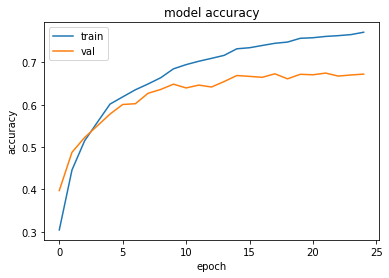

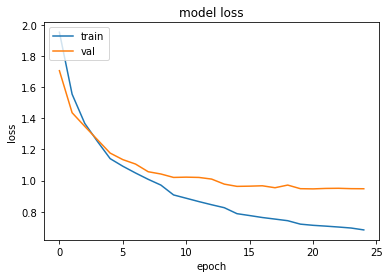

In [26]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
#e
from keras.optimizers import SGD, rmsprop
opt = rmsprop(lr=0.001, decay=1e-6)
batch_size = 75
epochs = 25
model2 = Sequential()
model2.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
history2 = model2.fit(x_train, y_train,epochs=epochs, validation_data=(x_val, y_val),shuffle=True)
model2.save_weights('modelo-p3-e.h5')

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 66s 1ms/step - loss: 1.3758 - acc: 0.5121 - val_loss: 1.0996 - val_acc: 0.6149
Epoch 2/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.9745 - acc: 0.6613 - val_loss: 1.0409 - val_acc: 0.6451
Epoch 3/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.8055 - acc: 0.7225 - val_loss: 0.8814 - val_acc: 0.6996
Epoch 4/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.6804 - acc: 0.7696 - val_loss: 0.9222 - val_acc: 0.6951
Epoch 5/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.5789 - acc: 0.8062 - val_loss: 0.9216 - val_acc: 0.7038
Epoch 6/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.4974 - acc: 0.8365 - val_loss: 1.0247 - val_acc: 0.7158
Epoch 7/25
45500/45500 [==============================] - 66s 1ms/step - loss: 0.4232 - acc: 0.8613 - val_loss: 1.1199 - val_acc:

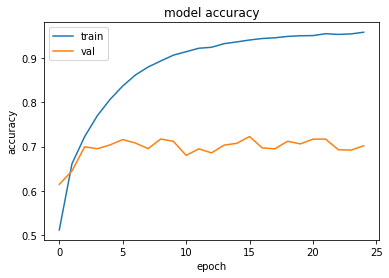

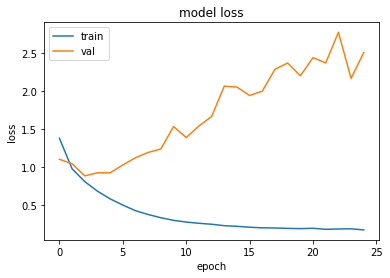

In [28]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.5824 - acc: 0.4583 - val_loss: 1.2885 - val_acc: 0.5471
Epoch 2/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.1615 - acc: 0.5909 - val_loss: 1.1788 - val_acc: 0.5796
Epoch 3/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.0033 - acc: 0.6493 - val_loss: 1.1133 - val_acc: 0.6044
Epoch 4/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.8806 - acc: 0.6923 - val_loss: 1.0698 - val_acc: 0.6273
Epoch 5/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.7689 - acc: 0.7316 - val_loss: 1.0243 - val_acc: 0.6453
Epoch 6/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.6626 - acc: 0.7698 - val_loss: 1.0667 - val_acc: 0.6367
Epoch 7/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.5648 - acc: 0.8039 - val_loss: 1.0201 - val_acc:

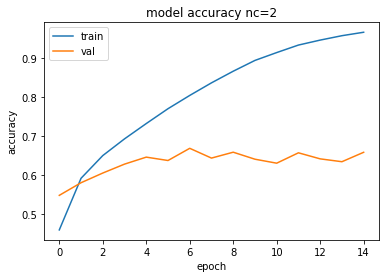

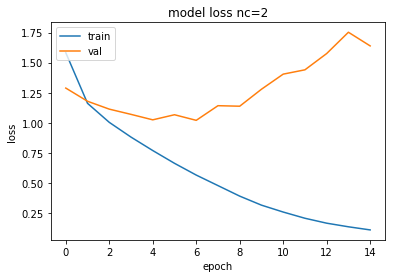

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.5088 - acc: 0.4775 - val_loss: 1.2845 - val_acc: 0.5502
Epoch 2/15
45500/45500 [==============================] - 73s 2ms/step - loss: 1.1034 - acc: 0.6159 - val_loss: 1.0701 - val_acc: 0.6224
Epoch 3/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.9171 - acc: 0.6789 - val_loss: 0.9963 - val_acc: 0.6602
Epoch 4/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.7617 - acc: 0.7360 - val_loss: 1.0117 - val_acc: 0.6613
Epoch 5/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.6208 - acc: 0.7873 - val_loss: 1.2528 - val_acc: 0.6022
Epoch 6/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.4894 - acc: 0.8323 - val_loss: 1.1038 - val_acc: 0.6638
Epoch 7/15
45500/45500 [==============================] - 73s 2ms/step - loss: 0.3757 - acc: 0.8731 - val_loss: 1.1187 - val_acc:

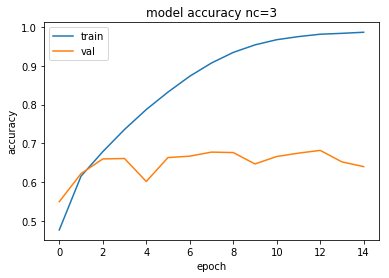

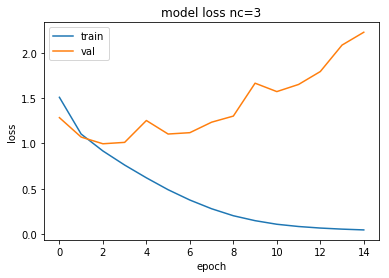

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.5098 - acc: 0.4740 - val_loss: 1.2798 - val_acc: 0.5529
Epoch 2/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.0915 - acc: 0.6186 - val_loss: 1.0916 - val_acc: 0.6229
Epoch 3/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.9011 - acc: 0.6866 - val_loss: 0.9975 - val_acc: 0.6593
Epoch 4/15
45500/45500 [==============================] - 75s 2ms/step - loss: 0.7402 - acc: 0.7447 - val_loss: 0.9551 - val_acc: 0.6747
Epoch 5/15
45500/45500 [==============================] - 75s 2ms/step - loss: 0.5961 - acc: 0.7936 - val_loss: 0.9915 - val_acc: 0.6744
Epoch 6/15
45500/45500 [==============================] - 75s 2ms/step - loss: 0.4573 - acc: 0.8428 - val_loss: 1.1082 - val_acc: 0.6771
Epoch 7/15
45500/45500 [==============================] - 75s 2ms/step - loss: 0.3421 - acc: 0.8846 - val_loss: 1.1700 - val_acc:

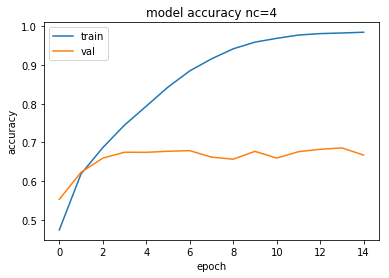

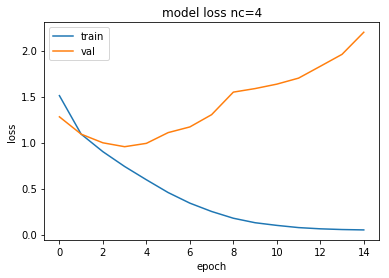

In [29]:
#f
import matplotlib.pyplot as plt
import numpy
%matplotlib inline
from keras.optimizers import SGD, rmsprop
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate

batch_size = 75
epochs = 15
#Shallow network
ncs = [2,3,4]
for nc in ncs:
    opt = rmsprop()
    model = Sequential()
    model.add(Conv2D(64, (nc, nc), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
    historyf = model.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
    # summarize history for accuracy
    plt.plot(historyf.history['acc'])
    plt.plot(historyf.history['val_acc'])
    plt.title('model accuracy nc='+str(nc))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(historyf.history['loss'])
    plt.plot(historyf.history['val_loss'])
    plt.title('model loss nc='+str(nc))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [30]:
#g
"""Se ha sugerido que la práctica bastante habitual de continuar una capa
convolucional con una capa de pooling puede generar una reducción prematura 
de las dimensiones del patrón de entrada. Experimente con una arquitectura del tipo  C×C×P×C×C×P×F×F. 
Use 64 filtros para las primeras 2 capas convolucionales y 128 para las últimas dos. 
Reflexione sobre qué le parece más sensato: ¿mantener el tamaño de los filtros usados anteriormente? 
o ¿usar filtros más grandes en la segunda capa convolucional y más pequeños en la primera? o 
¿usar filtros más pequeños en la segunda capa convolucional y más grandes en la primera? 
Hint: con esta nueva arquitectura debiese superar el 70% de accuracy (de validación/test) antes de 5 epochs, 
    pero la arquitectura es más sensible a overfitting por lo que podrı́a ser conveniente agregar un regularizador. 
    Como resultado final de esta actividad gráficque los errores de entrenamiento, validación y pruebas como 
    función del número de “epochs”(fijando el máximo en un número razonable como T = 25).
"""
from keras.optimizers import SGD, rmsprop
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = rmsprop()
batch_size = 75
epochs = 25

model4 = Sequential()
model4.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(128, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history4 = model4.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
model4.save_weights('modelo-p3-g1.h5')



Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 149s 3ms/step - loss: 1.6326 - acc: 0.4156 - val_loss: 1.1758 - val_acc: 0.5749
Epoch 2/25
 4050/45500 [=>............................] - ETA: 2:09 - loss: 1.1512 - acc: 0.5943

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
def step_decay(epoch):
    initial_lrate = 0.001
    lrate = initial_lrate * math.pow(0.5, math.floor((1+epoch)/5))
    lrate = max(lrate,0.00001)
    return lrate
opt = rmsprop()
batch_size = 75
epochs = 25

model5 = Sequential()
model5.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(Conv2D(128, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dense(10))
model5.add(Activation('softmax'))
model5.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history5 = model5.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
model5.save_weights('modelo-p3-g2.h5')

In [ ]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [3]:
#h
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
opt = rmsprop()
batch_size = 75
epochs = 25

model6 = Sequential()
model6.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model6.add(Activation('relu'))
model6.add(Conv2D(128, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model6.add(Activation('relu'))
model6.add(Dropout(0.25))
model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('relu'))
model6.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model6.add(Activation('relu'))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('relu'))
model6.add(Dense(10))
model6.add(Activation('softmax'))
model6.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])

history6 = model6.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
model6.save_weights('modelo-p3-h.h5')

Train on 45500 samples, validate on 4500 samples
Epoch 1/25
45500/45500 [==============================] - 642s 14ms/step - loss: 1.9631 - acc: 0.2783 - val_loss: 1.7145 - val_acc: 0.3760
Epoch 2/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.6102 - acc: 0.4149 - val_loss: 1.6039 - val_acc: 0.4233
Epoch 3/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.4843 - acc: 0.4631 - val_loss: 1.5077 - val_acc: 0.4533
Epoch 4/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.4010 - acc: 0.4966 - val_loss: 1.4311 - val_acc: 0.4851
Epoch 5/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.3385 - acc: 0.5209 - val_loss: 1.4491 - val_acc: 0.4842
Epoch 6/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.2855 - acc: 0.5415 - val_loss: 1.3892 - val_acc: 0.5167
Epoch 7/25
45500/45500 [==============================] - 205s 4ms/step - loss: 1.2413 - acc: 0.5577 - val_loss: 1.3691 - 

In [48]:
model6.summary()

NameError: name 'model6' is not defined

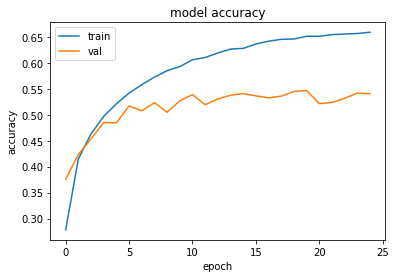

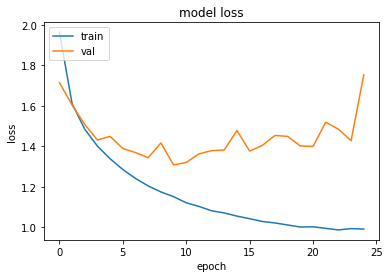

In [5]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
#i
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, rmsprop
from keras.callbacks import LearningRateScheduler
import math
opt = rmsprop()
batch_size = 75
epochs = 25

datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)

#model2.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
historyi = model2.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,
                    validation_data=(x_val, y_val))


Epoch 1/25
606/606 [==============================] - 45s 74ms/step - loss: 1.9913 - acc: 0.2902 - val_loss: 1.7388 - val_acc: 0.3967
Epoch 2/25
606/606 [==============================] - 45s 74ms/step - loss: 1.8230 - acc: 0.3453 - val_loss: 1.7088 - val_acc: 0.4047
Epoch 3/25
606/606 [==============================] - 45s 74ms/step - loss: 1.7594 - acc: 0.3679 - val_loss: 1.6319 - val_acc: 0.4200
Epoch 4/25
606/606 [==============================] - 45s 74ms/step - loss: 1.7273 - acc: 0.3828 - val_loss: 1.6182 - val_acc: 0.4304
Epoch 5/25
606/606 [==============================] - 45s 74ms/step - loss: 1.7058 - acc: 0.3871 - val_loss: 1.6170 - val_acc: 0.4436
Epoch 6/25
606/606 [==============================] - 45s 74ms/step - loss: 1.6803 - acc: 0.3971 - val_loss: 1.6094 - val_acc: 0.4398
Epoch 7/25
606/606 [==============================] - 45s 74ms/step - loss: 1.6635 - acc: 0.4026 - val_loss: 1.5740 - val_acc: 0.4507
Epoch 8/25
606/606 [==============================] - 45s 74ms

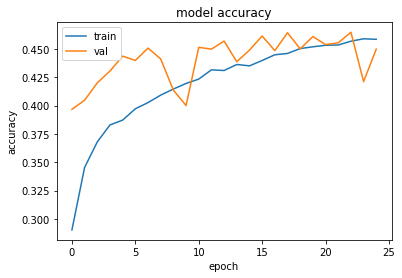

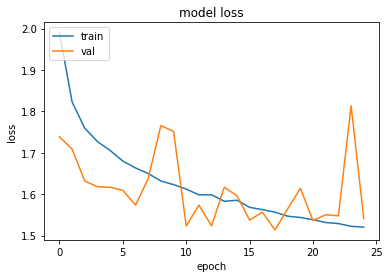

In [11]:
import matplotlib.pyplot as plt
import numpy
# summarize history for accuracy
plt.plot(historyi.history['acc'])
plt.plot(historyi.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyi.history['loss'])
plt.plot(historyi.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
#j
#Aqui es mas que nada desarrollo utilizando los codigos de arriba
opt = rmsprop()
epoch=15
batch_size=75
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["accuracy"])
historyj = model.fit(x_train, y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_val, y_val),shuffle=True)
model.save_weights('modelo-p3-j.h5')

Train on 45500 samples, validate on 4500 samples
Epoch 1/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.7958 - acc: 0.3932 - val_loss: 1.6316 - val_acc: 0.4060
Epoch 2/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.4232 - acc: 0.4970 - val_loss: 1.4334 - val_acc: 0.4916
Epoch 3/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.2610 - acc: 0.5577 - val_loss: 1.5393 - val_acc: 0.4633
Epoch 4/15
45500/45500 [==============================] - 74s 2ms/step - loss: 1.1127 - acc: 0.6111 - val_loss: 1.5545 - val_acc: 0.4682
Epoch 5/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.9668 - acc: 0.6640 - val_loss: 1.4243 - val_acc: 0.5153
Epoch 6/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.8159 - acc: 0.7185 - val_loss: 1.5332 - val_acc: 0.5093
Epoch 7/15
45500/45500 [==============================] - 74s 2ms/step - loss: 0.6742 - acc: 0.7671 - val_loss: 1.6427 - val_acc:

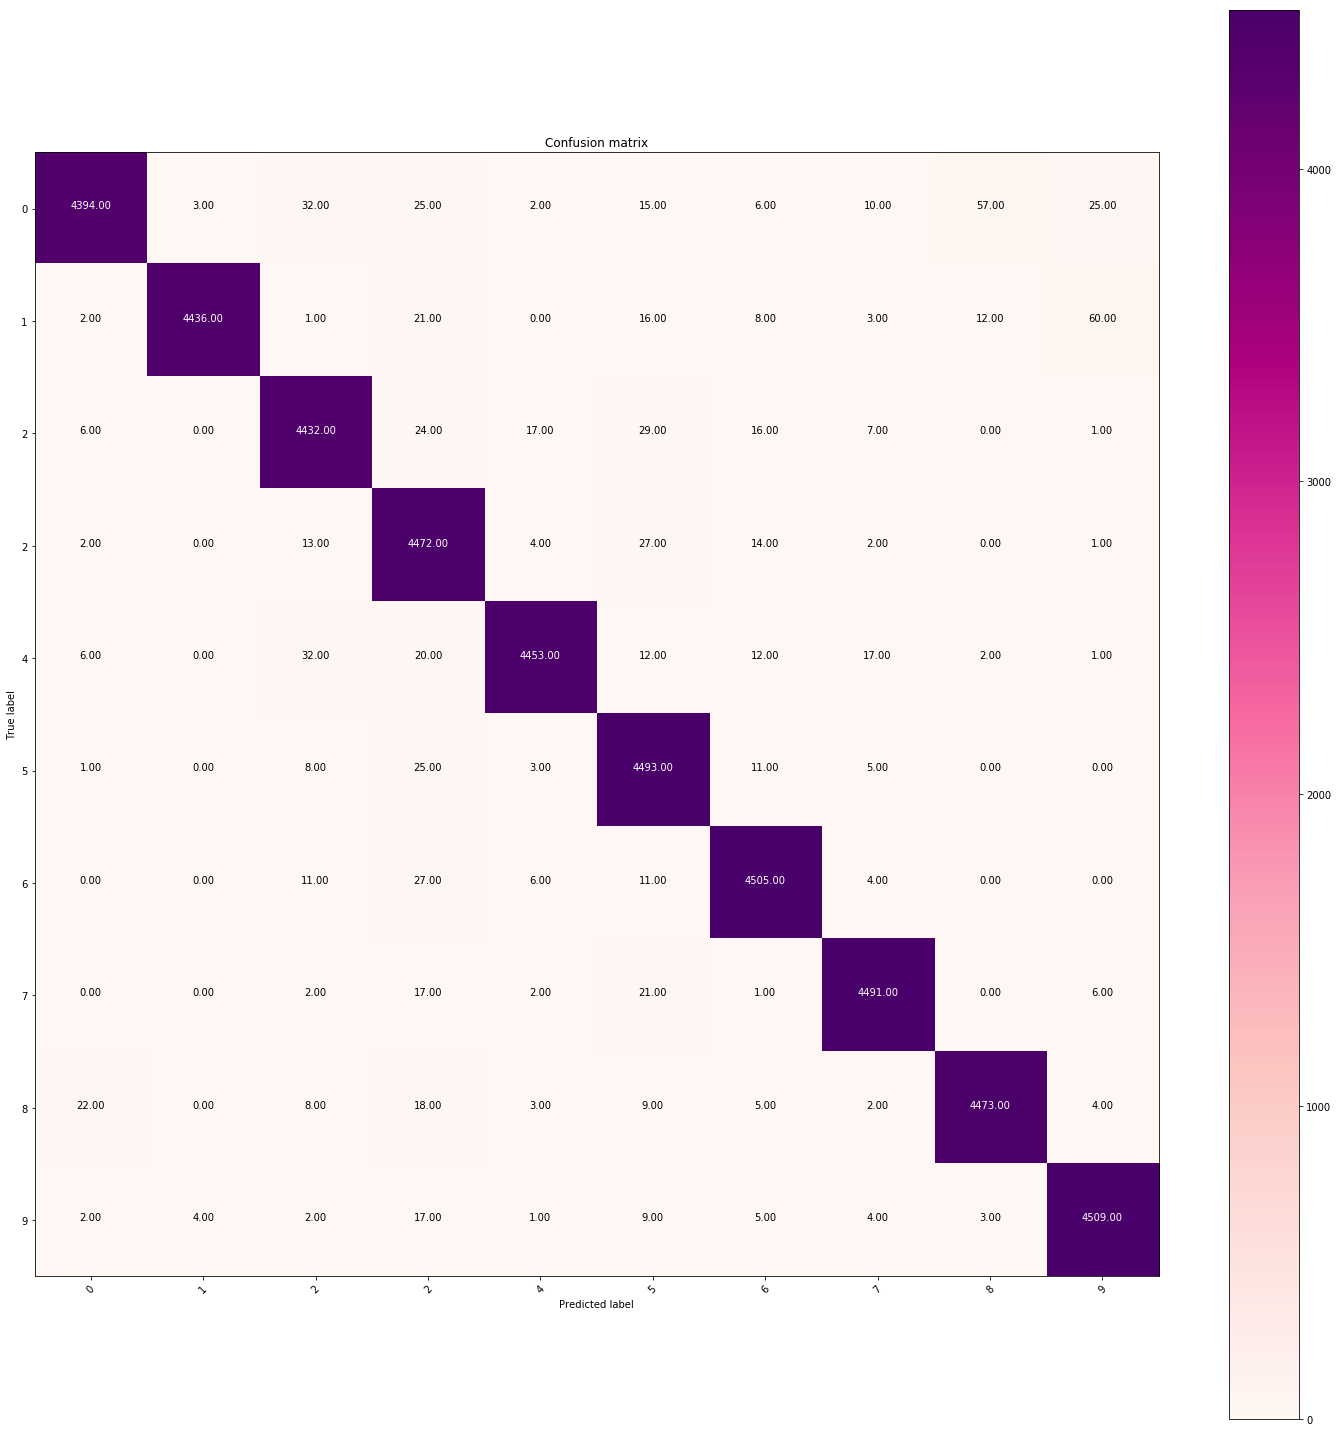

In [15]:

#codigo para matrices de confusion
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(x_train, batch_size=None, verbose=0, steps=None)
"""
for i in range(len(y_pred)):
    vector= np.zeros(10)
    argm=np.argmax(y_pred[i])
    vector[argm]=1
    cosa.append(vector)
np.vstack((y_train,y_pred)).T
print(cosa[0])

"""
Y=[]
Y_gorro=[]
for i in range(len(y_pred)):
    Y.append(np.argmax(y_train[i]))
    Y_gorro.append(np.argmax(y_pred[i]))
cm=confusion_matrix(Y, Y_gorro)
title='Confusion matrix'
cmap=plt.cm.RdPu
#classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes=[0,1,2,2,4,5,6,7,8,9]
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

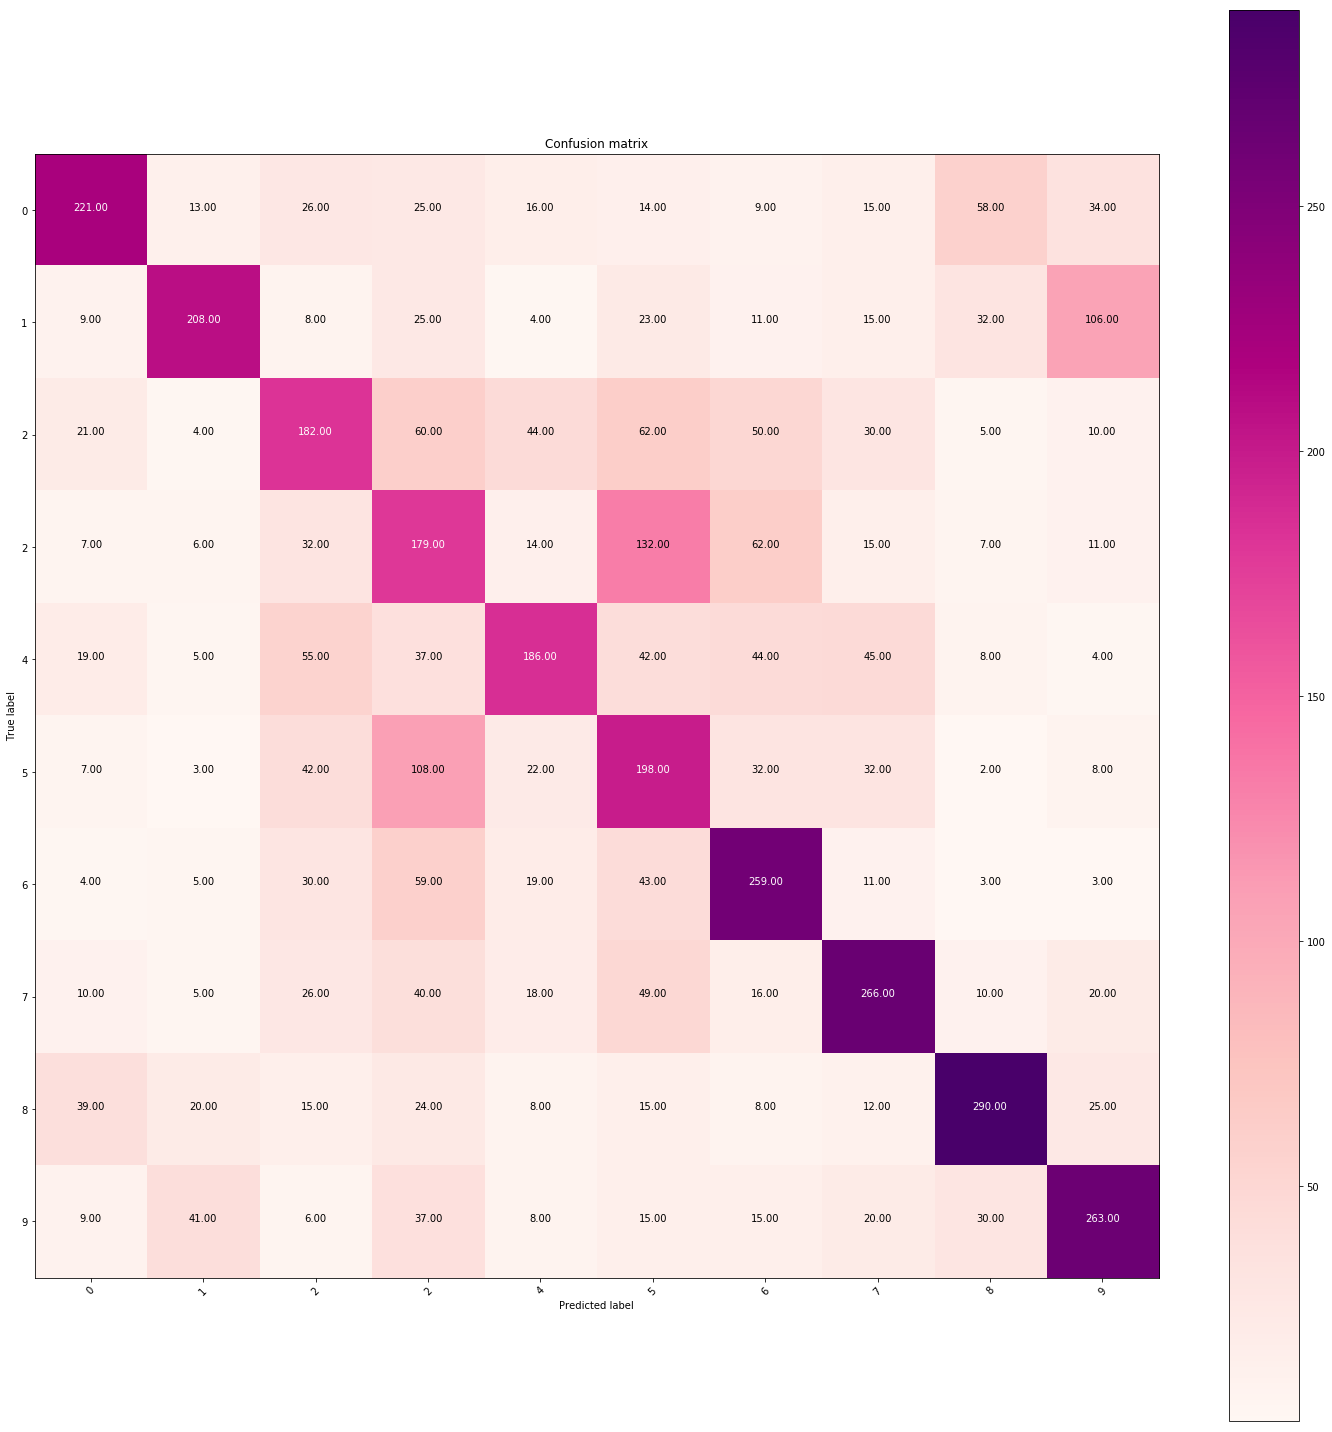

In [16]:

#codigo para matrices de confusion
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(x_val, batch_size=None, verbose=0, steps=None)


"""
for i in range(len(y_pred)):
    vector= np.zeros(10)
    argm=np.argmax(y_pred[i])
    vector[argm]=1
    cosa.append(vector)
np.vstack((y_train,y_pred)).T
print(cosa[0])

"""
Y=[]
Y_gorro=[]
for i in range(len(y_pred)):
    Y.append(np.argmax(y_val[i]))
    Y_gorro.append(np.argmax(y_pred[i]))
cm=confusion_matrix(Y, Y_gorro)
title='Confusion matrix'
cmap=plt.cm.RdPu
#classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes=[0,1,2,2,4,5,6,7,8,9]
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

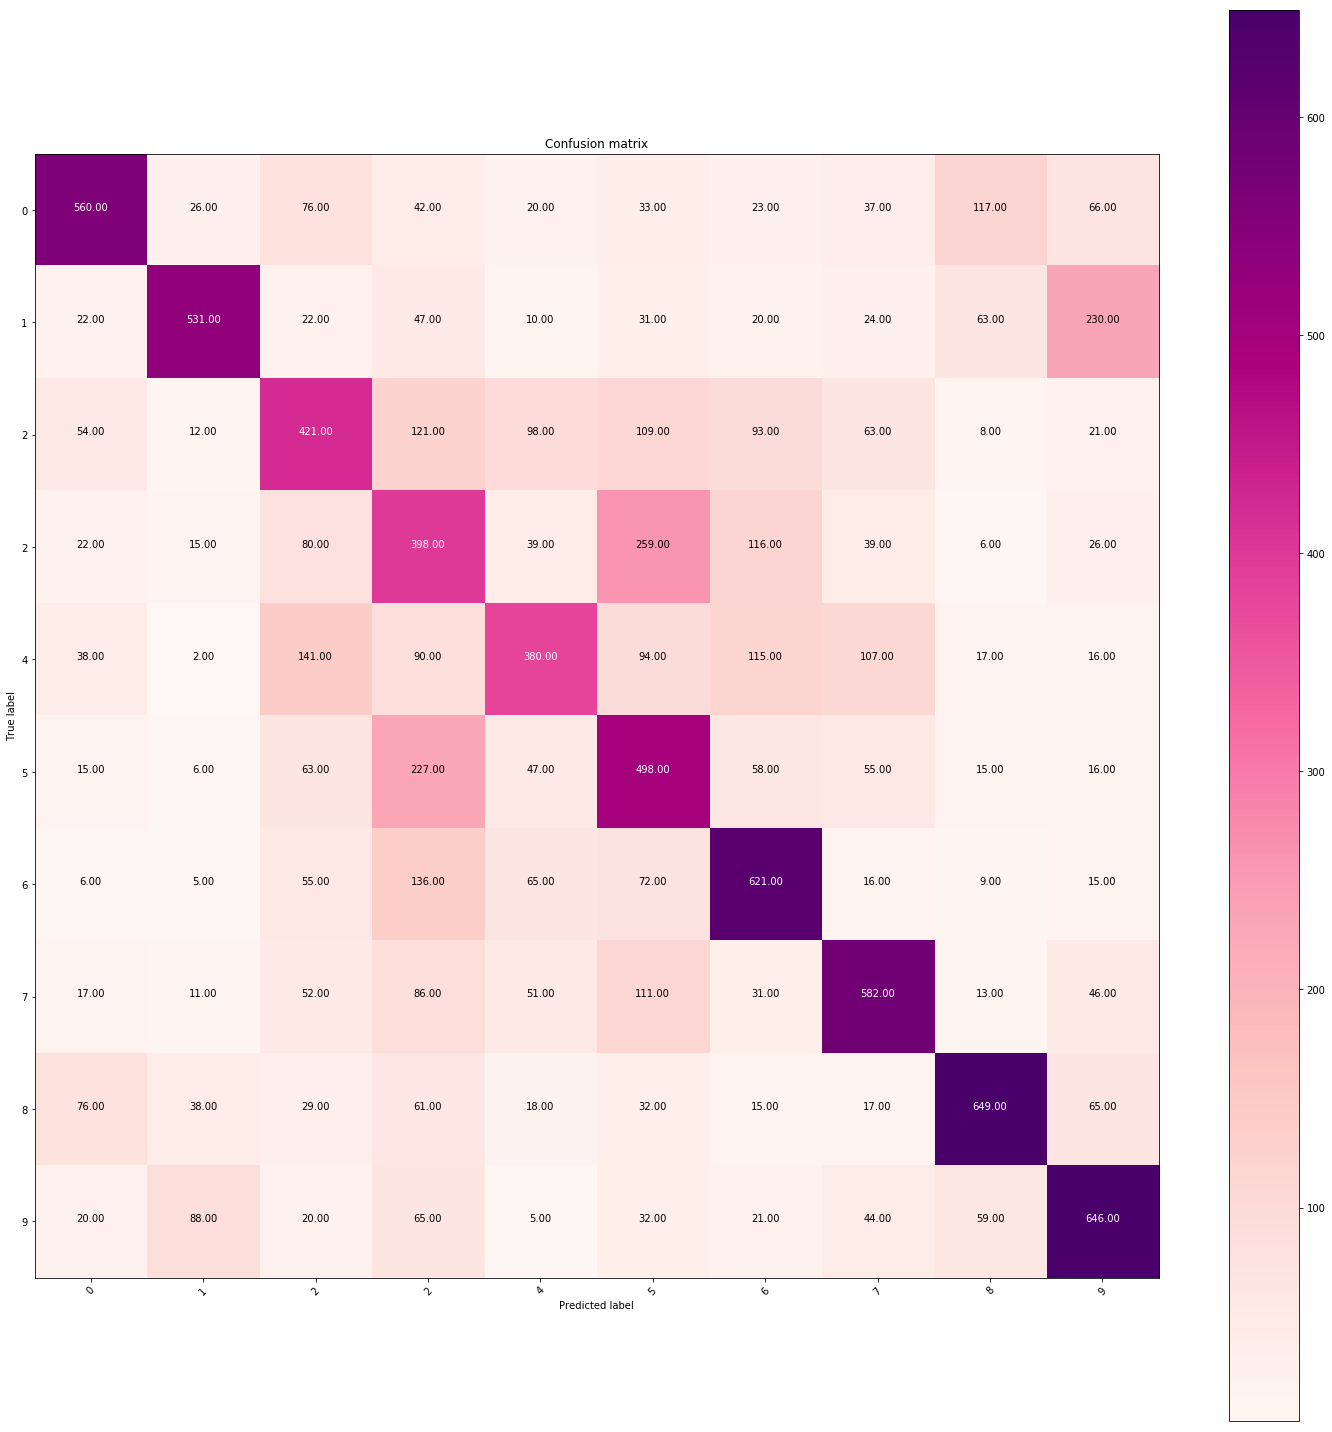

In [17]:

#codigo para matrices de confusion
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
y_pred = model.predict(x_test, batch_size=None, verbose=0, steps=None)

"""
for i in range(len(y_pred)):
    vector= np.zeros(10)
    argm=np.argmax(y_pred[i])
    vector[argm]=1
    cosa.append(vector)
np.vstack((y_train,y_pred)).T
print(cosa[0])

"""
Y=[]
Y_gorro=[]
for i in range(len(y_pred)):
    Y.append(np.argmax(y_test[i]))
    Y_gorro.append(np.argmax(y_pred[i]))
cm=confusion_matrix(Y, Y_gorro)
title='Confusion matrix'
cmap=plt.cm.RdPu
#classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes=[0,1,2,2,4,5,6,7,8,9]
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#k
#hacer lo de la pregunta 2, pero con las redes de convolución

<a id="cuarto"></a>
## 4. Aplicación de una red neuronal en Localización
Desde la edad antigua, múltiples formas de localización han sido desarrolladas. Dentro de los avances más importantes en este ámbito, es el desarrollo de la teorı́a cientı́fica y técnica denominada georreferenciación. Gracias a GPS, el crecimiento y acceso de la georreferenciación y navegación está en progresivo aumento, el problema surge cuando se intentan estimar en recintos interiores (como edificios o bajo tierra) donde el GPS no funciona de la manera como uno esperaría, debido a que existen muchos obstáculos e interferencia que imposibilitan su uso.  
Dentro de interiores se cuenta con señales RSSI (*fingerprint*) que pueden atacar este problema, sin embargo los métodos actuales no son robustos a ruido, por lo que su tarea será la de abordar este problema para mejorar exactitud de sistemas de posicionamiento en interiores mediante redes neuronales.  

La metodología con la que se trabajará será que, para dentro de interiores, dispositivos *Bluetooth* emiten señales RSSI las cuales son captadas por el dispositivo "objetivo" al cual se le desea determinar su localización, recibiendo distintas intensidades de señal de cada dispositivo emisor debido a su posición en el interior. Los datos con los que se va a trabajar (*IndoorFingerprint.csv*) fueron provistos por el nuevo Ing. Civil Informático Felipe Berrios, éstos constan de 8 características (*C1hA,0kxZ,tvMX,OlYb,7rk5,F39L,VNSF,tkxI*) correspondientes a las mediciones hechas/recibidas por el dispositivo "objetivo" de las distintas señales RSSI emitidas por los dispositivos *Bluetooth* en los bordes del interior, además de tener la posición del dispositivo "objetivo" en un plano XY (valor a estimar).

<img src="https://i.imgur.com/Xheipaa.png" width="60%" height="20%" />

Grilla ejemplo de cómo funciona el sistema (elaboración por Felipe Berrios). Los 4 dispositivos en la esquina son los que emiten las señales RSSI, el punto naranja es el dispositivo que las recibe y es el "objetivo" a determinar la posición.

Una consideración importante es el cómo tratar la ausencia de la señal proveniente de un dispositivo *Bluetooth*, para estos datos se utiliza un valor de +100, ya que es imposible obtener este valor debido a las características de la escala RSSI (siempre negativa o igual a cero), pero puede ser sustituido por otro.  
Para hacer el trabajo mas simple se discretizará la posición en el plano definiendo zonas en dónde está el objeto a localizar. Las zonas deben ser las que indica la malla a continuación:

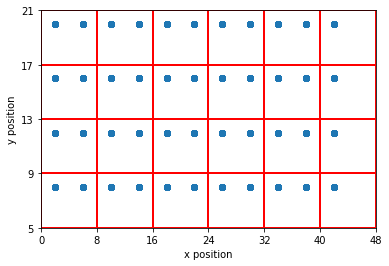

In [25]:
import pandas as pd
df = pd.read_csv("./IndoorFingerprint.csv")

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["X"],df["Y"])

x_ticks = np.arange(0, 49, 8)
y_ticks = np.arange(5, 22, 4)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(color='r', linestyle='-', linewidth=2)
plt.ylabel("y position")
plt.xlabel("x position")
plt.show()

Donde los puntos azules son los distintos datos superpuestos de las posiciones del objeto a localizar. Por ejemplo el punto (2,8) está en la primera zona (o en la primera zona del eje *x* y del eje *y*), el punto (2,20) está en la zona 19 (o en la primera zona del eje *x* y la cuarta zona del eje *y*). Esta discretización transforma el problema que en un principio podría ser de regresión para determinar la posición exacta, en un problema de clasificación dividiendo (dentro de los posibles valores) 6 zonas para el eje "*x*" y 4 zonas para el eje "*y*", contando con un total de 24 clases (24 zonas en la malla).

> Deberá entrenar una red neuronal *feed forward* para la clasificación de las 24 posibles clases, con el objetivo de tener un desempeño (*accuracy*) mayor al 75%.
#### Importante
El conjunto de pruebas está **fijado** a través de los indices de posiciones del dataset, por lo que deberá leer estos indices y crear el conjunto de pruebas a partir de éstos.
```python
mask_test = np.loadtxt('mask_test.csv',dtype="i")
X_test = X[mask_test]
X_train = np.delete(X,mask_test,axis=0)
```
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con los modelos</div>

In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler
mask_test = np.loadtxt('mask_test.csv',dtype="i")
#print(mask_test)

X = df['X'].values
print(X.shape)
#scaler = StandardScaler().fit(X)
#X_scaled = pd.DataFrame(scaler.transform(X),columns=X.columns)
#x_test = X_scaled[mask_test]
Y = df['Y'].values
y_test=Y[mask_test]
x_test = X[mask_test]
print(x_test.shape)
print(X.shape)
#print(y_test)


#x_test.head()
x_train = np.delete(X,mask_test,axis=0)

#scaler = StandardScaler().fit(df_train)
#X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
#y_train = df_train.pop('MEDV').reshape(-1,1)

(6600,)
(1980,)
(6600,)


ValueError: Wrong number of items passed 4620, placement implies 6600

<a id="refs"></a>
## Referencias
[1] Glorot, X., & Bengio, Y. (2010, March). *Understanding the difficulty of training deep feedforward neural networks*. In Proceedings of the thirteenth international conference on artificial intelligence and statistics (pp. 249-256).    
[2]  He, K., Zhang, X., Ren, S., & Sun, J. (2015). *Delving deep into rectifiers: Surpassing human-level performance on imagenet classification*. In Proceedings of the IEEE international conference on computer vision (pp. 1026-1034).  
[3] Krizhevsky, A., & Hinton, G. (2009). Learning multiple layers of features from tiny images.